<a href="https://colab.research.google.com/github/vikram2727/Time-series-Forcasting/blob/main/forcast_lstm_and_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
from matplotlib.pylab import rcParams
#plt.style.use("seaborn-white")
rcParams['figure.figsize'] = 17,9
import plotly.express as px

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv("/content/sample_data/bhp3.csv")
df.head()

dates   well_name         bhp  ...  oil_vol    gas_vol  water_vol
0  2014-04-22  15/9-F-1 C  289.421362  ...   631.47   90439.09        0.0
1  2014-04-23  15/9-F-1 C  270.239793  ...  1166.46  165720.39        0.0
2  2014-04-24  15/9-F-1 C  262.842748  ...  1549.81  221707.31        0.0
3  2014-04-25  15/9-F-1 C  255.526995  ...  1248.70  178063.52        0.0
4  2014-04-26  15/9-F-1 C  247.199052  ...  1345.78  192602.19        0.0

[5 rows x 11 columns]

In [ ]:
## Cleaning up the data
col = ['dates','oil_vol']
df = df[col] 
df.head()

dates  oil_vol
0  2014-04-22   631.47
1  2014-04-23  1166.46
2  2014-04-24  1549.81
3  2014-04-25  1248.70
4  2014-04-26  1345.78

In [ ]:
from datetime import datetime
df['dates'] = pd.to_datetime(df['dates'], infer_datetime_format=True)
df = df.set_index(['dates'])
df.head()

oil_vol
dates              
2014-04-22   631.47
2014-04-23  1166.46
2014-04-24  1549.81
2014-04-25  1248.70
2014-04-26  1345.78

In [ ]:
import seaborn as sns
plt.style.use("seaborn-white")
sns.set_style("white")

In [ ]:
# new data processed during arima model

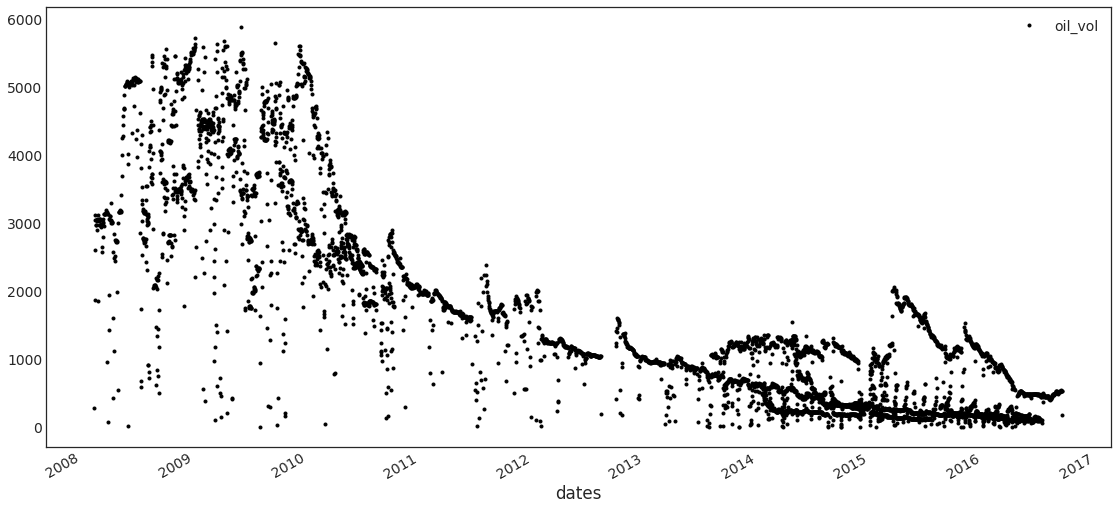

In [ ]:
df.plot(style = 'k.')

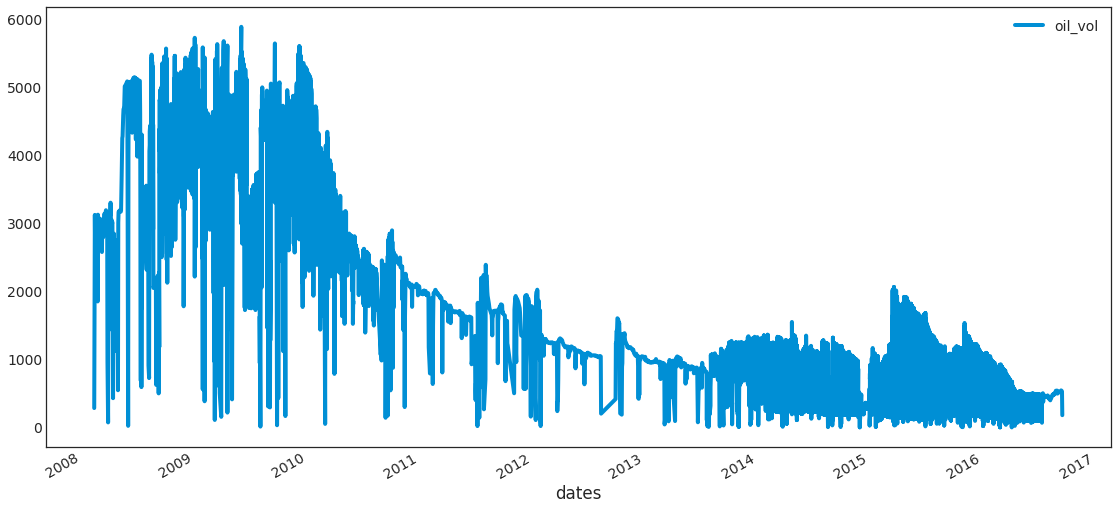

In [ ]:
df.plot()

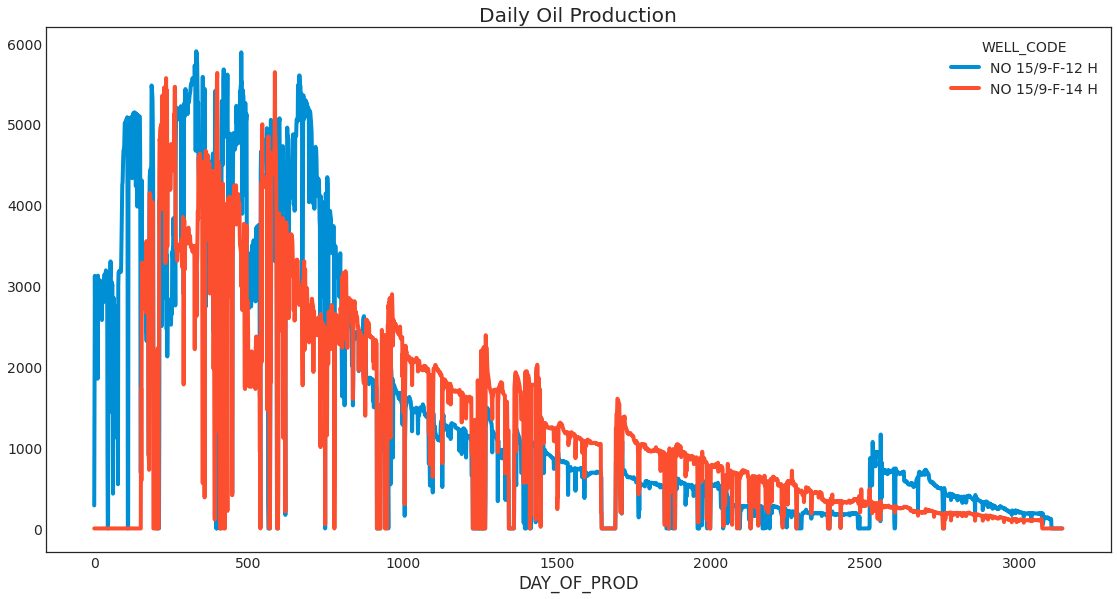

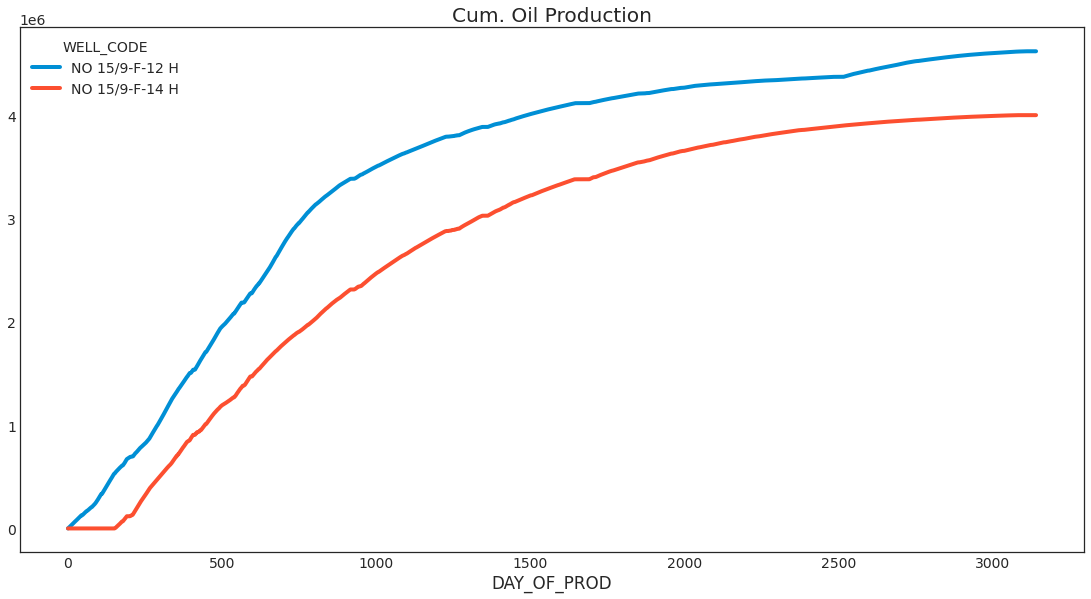

In [ ]:
df1 = pd.read_csv("/content/sample_data/Volve_Oil_Production.csv")
well_codes = df1.WELL_CODE.unique()
df1 = df1.pivot(index='DAY_OF_PROD', columns='WELL_CODE', values=['OIL_PROD_VOL', 'CUM_OIL_PROD'])
df1.plot(y='OIL_PROD_VOL', title='Daily Oil Production')
df1.plot(y='CUM_OIL_PROD', title='Cum. Oil Production')

In [ ]:
well_codes

array(['NO 15/9-F-12 H', 'NO 15/9-F-14 H'], dtype=object)

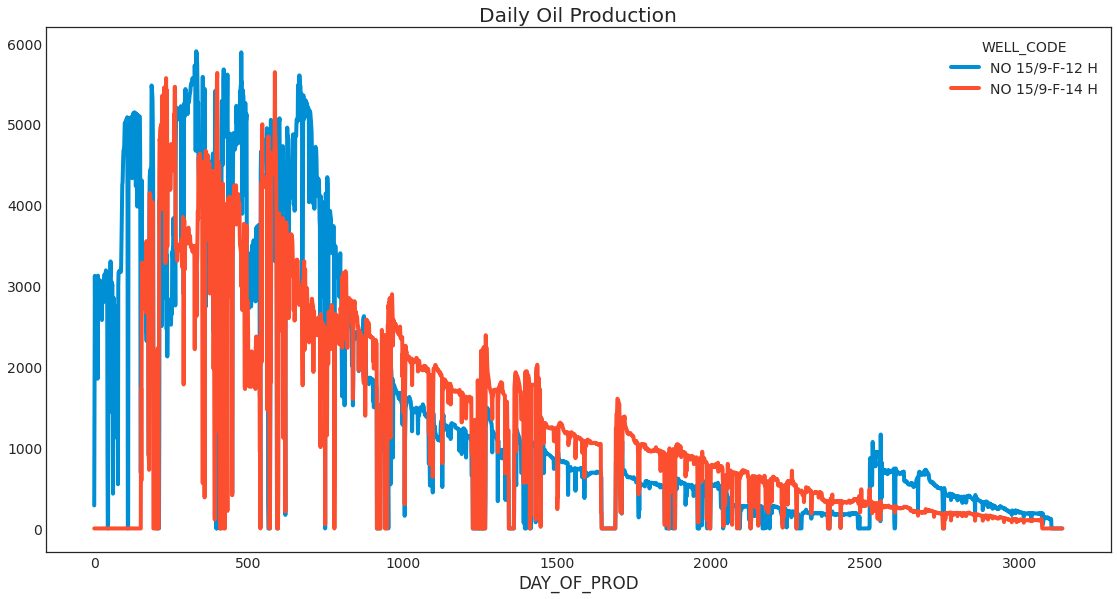

In [ ]:
df1 = pd.read_csv("/content/sample_data/Volve_Oil_Production.csv")
well_codes = df1.WELL_CODE.unique()
df1 = df1.pivot(index='DAY_OF_PROD', columns='WELL_CODE', values=['OIL_PROD_VOL', 'CUM_OIL_PROD'])
df1.plot(y='OIL_PROD_VOL', title='Daily Oil Production')


In [ ]:
#plt.plot(df['OIL_PROD_VOL'],style = 'k.', title='Daily Oil Production')

#plt.plot(y='OIL_PROD_VOL', title='Daily Oil Production')

*# LSTM model

In [ ]:
# Let's import the libraries required for the image classification
import os
import glob
RAND_SEED = 12345
import numpy as np
np.random.seed(RAND_SEED)
import tensorflow as tf
tf.random.set_seed(RAND_SEED)
import random
random.seed(RAND_SEED)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Multivariant LSTM

 **ARIMA model**

In [ ]:
df = pd.read_csv("/content/sample_data/bhp3.csv")
df.head()

dates   well_name         bhp  ...  oil_vol    gas_vol  water_vol
0  2014-04-22  15/9-F-1 C  289.421362  ...   631.47   90439.09        0.0
1  2014-04-23  15/9-F-1 C  270.239793  ...  1166.46  165720.39        0.0
2  2014-04-24  15/9-F-1 C  262.842748  ...  1549.81  221707.31        0.0
3  2014-04-25  15/9-F-1 C  255.526995  ...  1248.70  178063.52        0.0
4  2014-04-26  15/9-F-1 C  247.199052  ...  1345.78  192602.19        0.0

[5 rows x 11 columns]

In [ ]:
a = df['well_name']
a

0        15/9-F-1 C
1        15/9-F-1 C
2        15/9-F-1 C
3        15/9-F-1 C
4        15/9-F-1 C
           ...     
5935    15/9-F-15 D
5936    15/9-F-15 D
5937    15/9-F-15 D
5938    15/9-F-15 D
5939    15/9-F-15 D
Name: well_name, Length: 5940, dtype: object

In [ ]:
wellnames = df['well_name'].unique()
wellnames

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

In [ ]:
import seaborn as sns
#sns.pairplot(df[df['well_name']==wellnames[0]])

In [ ]:
well = (df[df['well_name']==wellnames[3]])

In [ ]:
well.head()

dates  well_name         bhp  ...  oil_vol    gas_vol  water_vol
2471  2008-07-13  15/9-F-14  260.866875  ...  1735.26  252235.23       4.00
2472  2008-07-14  15/9-F-14  256.248230  ...   592.36   88949.00       1.37
2473  2008-07-15  15/9-F-14  254.982785  ...  2532.21  373786.28       5.84
2474  2008-07-16  15/9-F-14  251.475921  ...  3030.71  447840.09       9.13
2475  2008-07-17  15/9-F-14  249.346191  ...  3288.08  474614.43       7.58

[5 rows x 11 columns]

In [ ]:
well.describe()

bhp          bht  ...        gas_vol    water_vol
count  2702.000000  2702.000000  ...    2702.000000  2702.000000
mean    247.873640   102.211742  ...  211138.168501  2627.660803
std      17.118678     4.376043  ...  181883.790407  1279.298570
min      49.450440    20.959721  ...     856.020000   -59.190000
25%     240.838234    99.885401  ...   50795.285000  2138.347500
50%     247.327503   101.901072  ...  163943.635000  3108.110000
75%     261.558907   105.151119  ...  324990.717500  3494.180000
max     289.897009   106.772733  ...  789974.730000  5691.770000

[8 rows x 9 columns]

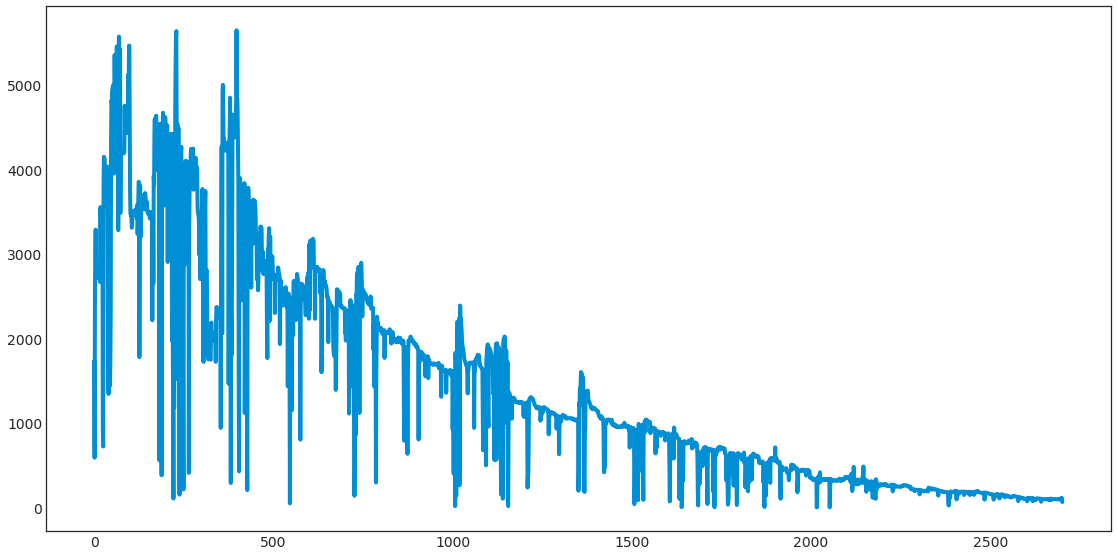

In [ ]:
plt.plot(well['oil_vol'].values)

In [ ]:
px.box(well, x='oil_vol', orientation='h', points='all')

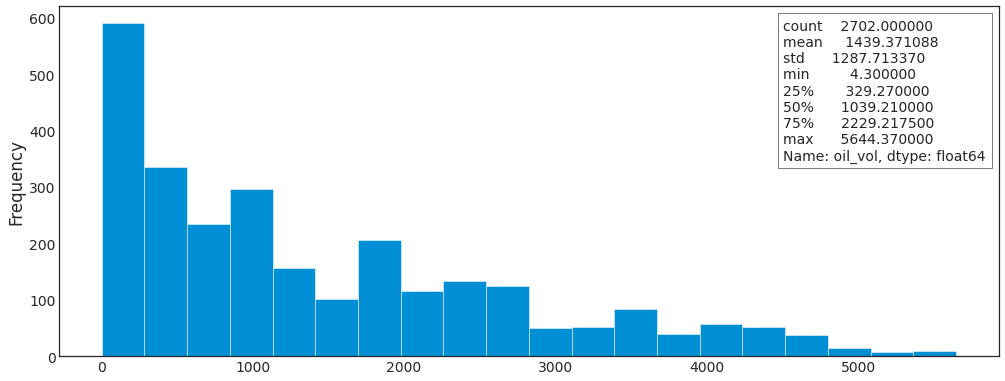

In [ ]:
import plotly.express as px                      ## histrogram of kvlog displayin basis distrinbution 
                                                     ## no usefull as we see go for boxplot
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(15,6))

well['oil_vol'].plot.hist(bins=20) #this is the type of plot and which data
anchored_text = AnchoredText(str(well['oil_vol'].describe()), loc=1)
ax.add_artist(anchored_text)


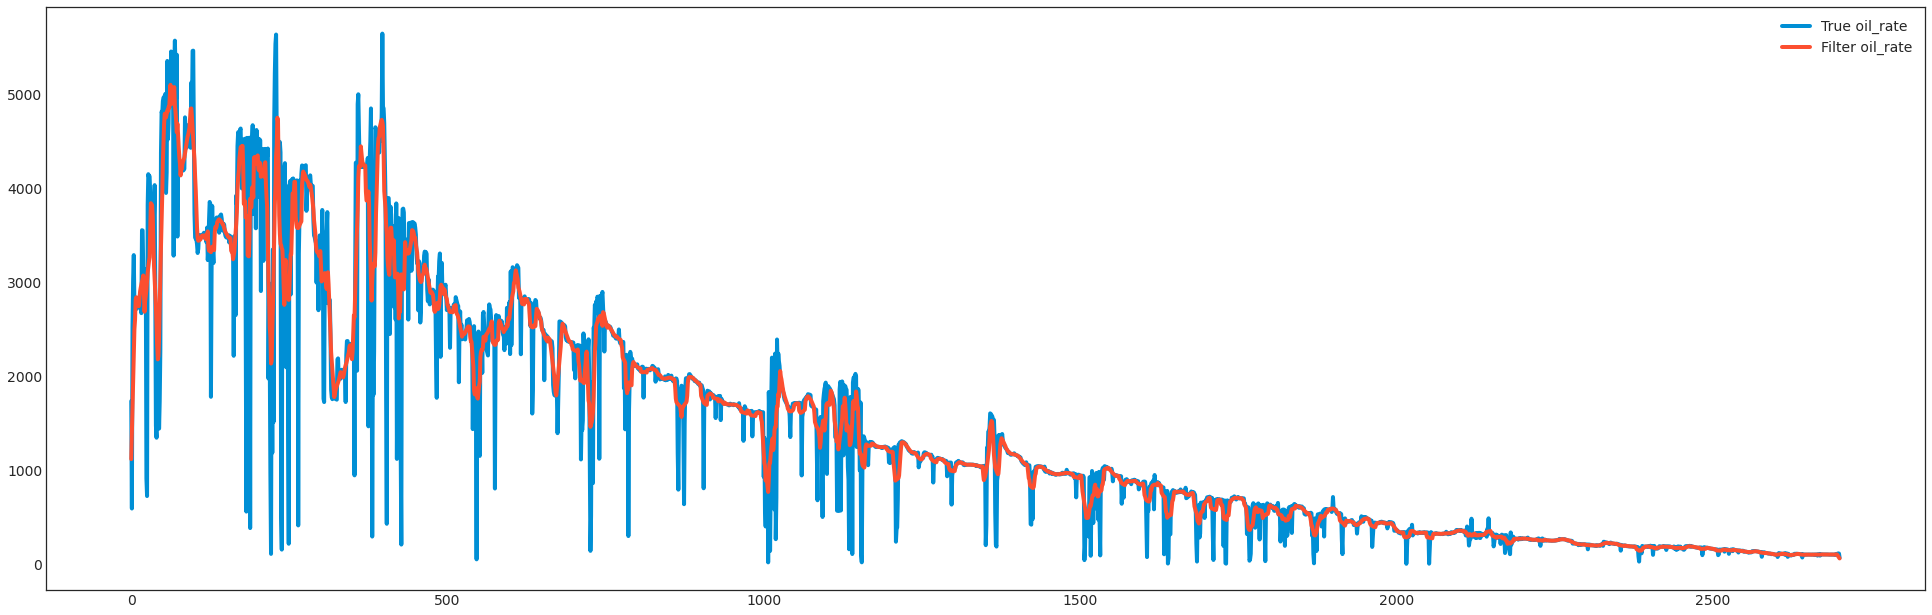

In [ ]:
#smoothing 
## smoothing vertical permeability 
p = well['oil_vol'].values
filter_length = 10
tair_moving_avg = np.convolve(p,np.ones((filter_length)),mode = 'same')
tair_moving_avg /= filter_length

#plt.rcParams.update({'font.size': 29})
plt.figure(figsize = (30,10))
plt.plot(p, label = 'True oil_rate')
plt.plot(tair_moving_avg, label = 'Filter oil_rate')
plt.legend()
plt.show()

In [ ]:
col = ['S_oil_rate']
kh = pd.DataFrame(tair_moving_avg, columns=col)

well['oil_vol'] = kh['S_oil_rate'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



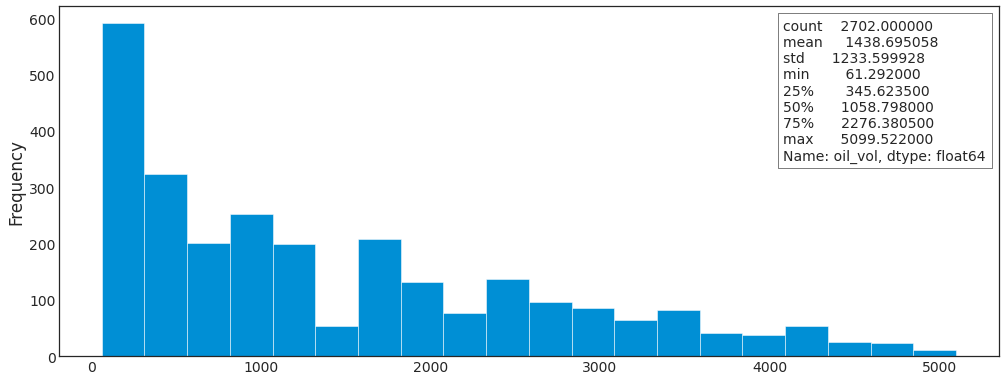

In [ ]:
import plotly.express as px                      ## histrogram of kvlog displayin basis distrinbution 
                                                     ## no usefull as we see go for boxplot
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(figsize=(15,6))

well['oil_vol'].plot.hist(bins=20) #this is the type of plot and which data
anchored_text = AnchoredText(str(well['oil_vol'].describe()), loc=1)
ax.add_artist(anchored_text)

In [ ]:
px.box(well, x='oil_vol', orientation='h', points='all')

In [ ]:
well.head()

dates  well_name         bhp  ...   oil_vol    gas_vol  water_vol
2471  2008-07-13  15/9-F-14  260.866875  ...  1117.862  252235.23       4.00
2472  2008-07-14  15/9-F-14  256.248230  ...  1395.868   88949.00       1.37
2473  2008-07-15  15/9-F-14  254.982785  ...  1673.306  373786.28       5.84
2474  2008-07-16  15/9-F-14  251.475921  ...  1952.407  447840.09       9.13
2475  2008-07-17  15/9-F-14  249.346191  ...  2226.717  474614.43       7.58

[5 rows x 11 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f40c679f350>,
      dtype=object)

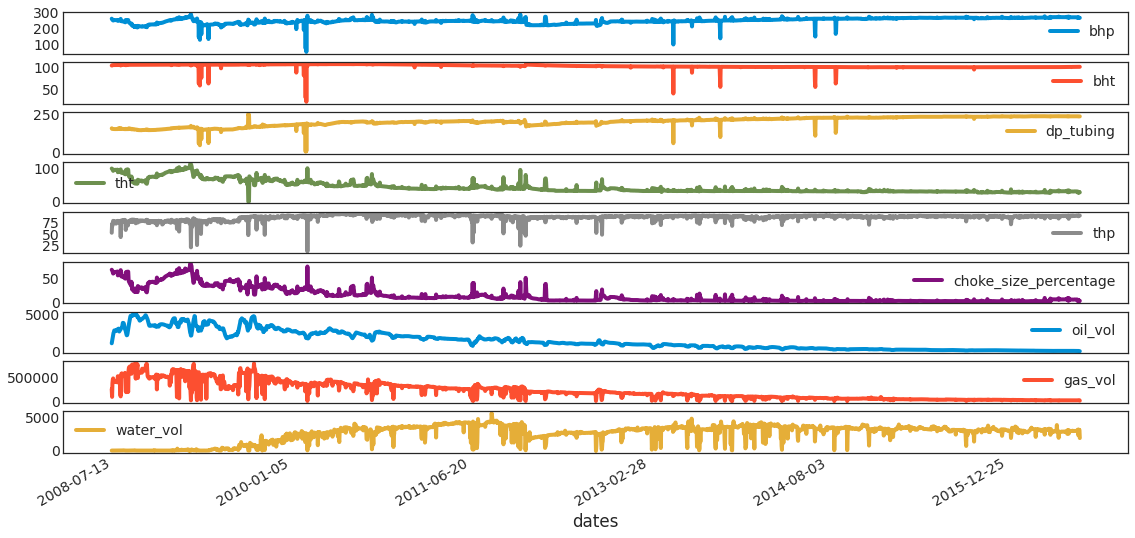

In [ ]:
# dataframe for ML
well.set_index('dates')[['bhp','bht','dp_tubing','tht',	'thp','choke_size_percentage','oil_vol','gas_vol','water_vol']].plot(subplots = True)

In [ ]:
col = ['dates','oil_vol']
df = well[col] 
df.head()

dates   oil_vol
2471  2008-07-13  1117.862
2472  2008-07-14  1395.868
2473  2008-07-15  1673.306
2474  2008-07-16  1952.407
2475  2008-07-17  2226.717

In [ ]:
df.query('oil_vol > 50')

dates   oil_vol
2471  2008-07-13  1117.862
2472  2008-07-14  1395.868
2473  2008-07-15  1673.306
2474  2008-07-16  1952.407
2475  2008-07-17  2226.717
...          ...       ...
5168  2016-07-09   101.996
5169  2016-07-10    91.929
5170  2016-07-11    81.741
5171  2016-07-12    71.911
5172  2016-07-13    61.292

[2702 rows x 2 columns]

In [ ]:
df.describe()

oil_vol
count  2702.000000
mean   1438.695058
std    1233.599928
min      61.292000
25%     345.623500
50%    1058.798000
75%    2276.380500
max    5099.522000

In [ ]:
from datetime import datetime
df['dates'] = pd.to_datetime(df['dates'], infer_datetime_format=True)
df = df.set_index(['dates'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



oil_vol
dates               
2008-07-13  1117.862
2008-07-14  1395.868
2008-07-15  1673.306
2008-07-16  1952.407
2008-07-17  2226.717

In [ ]:
df.to_csv(r'/content/sample_data/file3.csv', index=False)

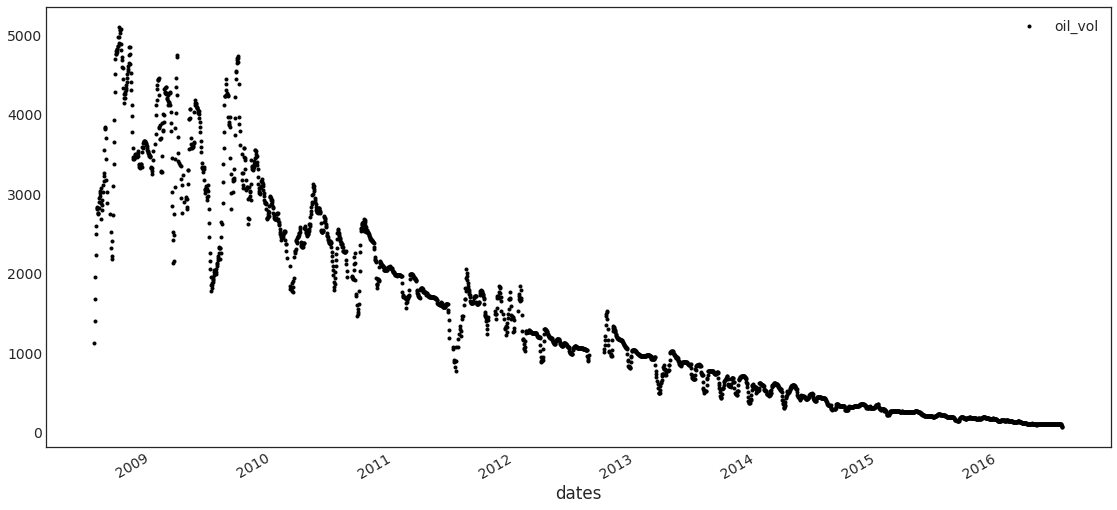

In [ ]:
df.plot(style = 'k.')

In [ ]:
#check the stanaritay
# test 1 rolling mean

#determining the rolling statistics 
rolmean = df.rolling(window=30).mean()

rolstd = df.rolling(window=30).std()

print(rolmean,rolstd)

               oil_vol
dates                 
2008-07-13         NaN
2008-07-14         NaN
2008-07-15         NaN
2008-07-16         NaN
2008-07-17         NaN
...                ...
2016-07-09  102.909133
2016-07-10  102.566500
2016-07-11  101.882100
2016-07-12  100.865600
2016-07-13   99.496433

[2702 rows x 1 columns]               oil_vol
dates                
2008-07-13        NaN
2008-07-14        NaN
2008-07-15        NaN
2008-07-16        NaN
2008-07-17        NaN
...               ...
2016-07-09   0.835875
2016-07-10   2.172014
2016-07-11   4.380108
2016-07-12   7.005833
2016-07-13  10.053214

[2702 rows x 1 columns]


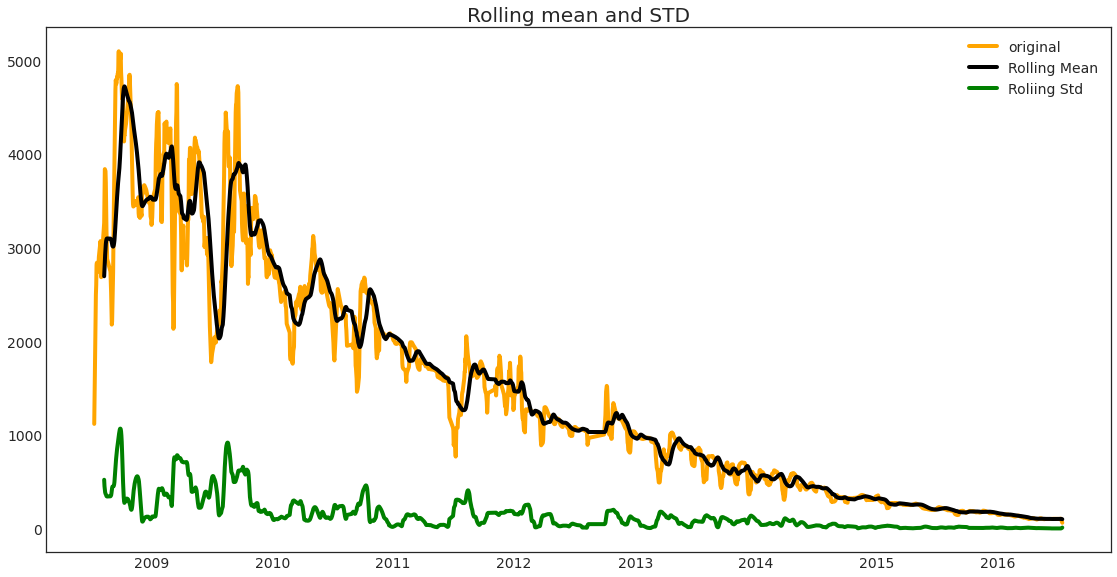

In [ ]:
#plot 

original = plt.plot(df, color= 'orange',label = "original")
mean = plt.plot(rolmean,color= 'black',label='Rolling Mean')
std  = plt.plot(rolstd, color='green',label ='Roliing Std')

plt.legend(loc = 'best')
plt.title('Rolling mean and STD')
plt.show(block= False)

In [ ]:
#2 Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('results of the Dickey-fuller test:')

dftest = adfuller(df['oil_vol'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Obeservation used'])

for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print(dfoutput)

results of the Dickey-fuller test:
Test Statistic                   -1.731449
p-value                           0.414986
#Lags Used                       28.000000
Number of Obeservation used    2673.000000
Critical Values (1%)             -3.432799
Critical Values (5%)             -2.862622
Critical Values (10%)            -2.567346
dtype: float64


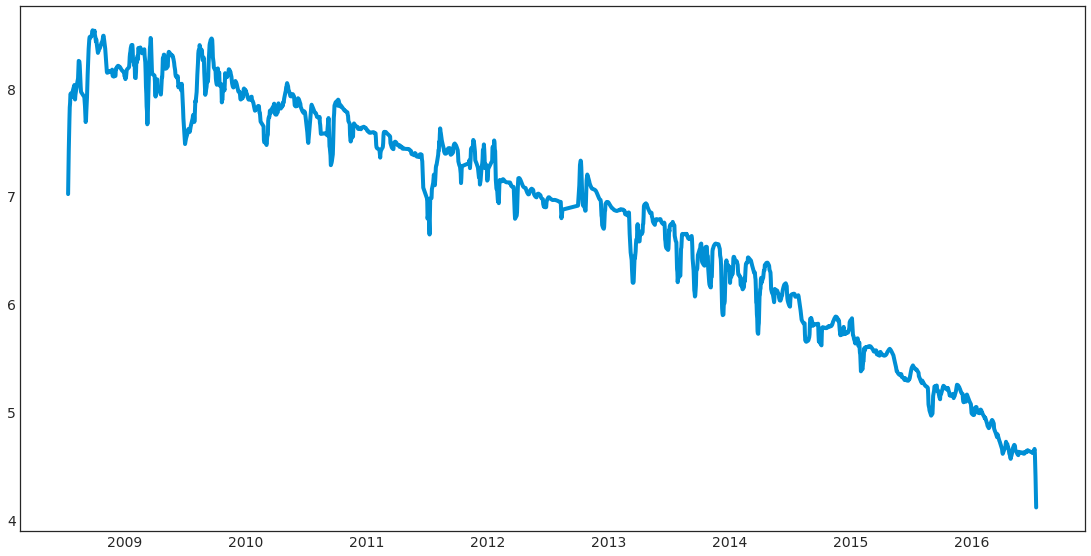

In [ ]:
# null hypothesis says the p-value must very small but we can observe p-value is 0.93

#Estimating trend
df_logScale = np.log(df)
plt.plot(df_logScale)

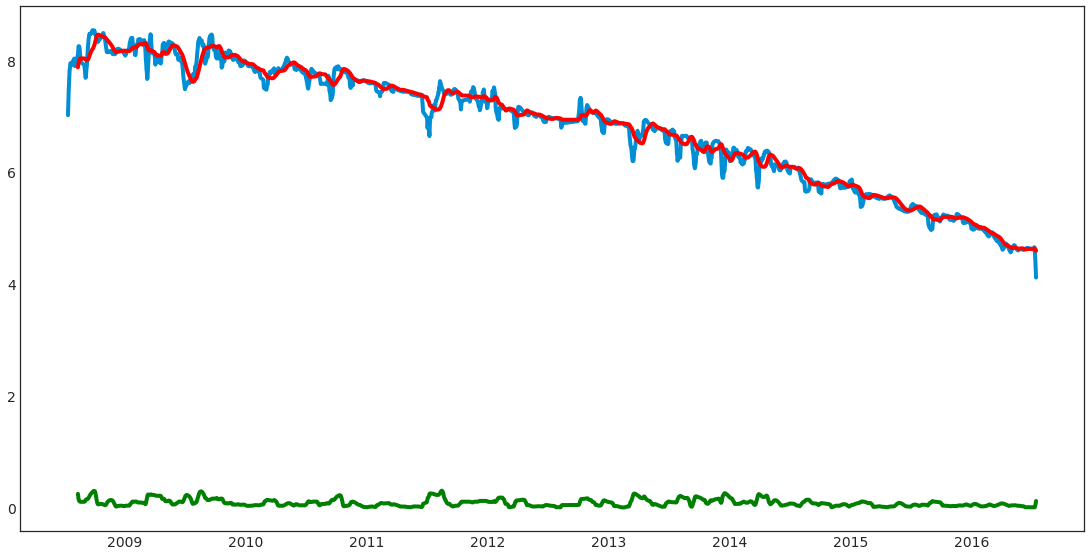

In [ ]:
moving_avg = df_logScale.rolling(window=30).mean()

movingSTD = df_logScale.rolling(window=30).std()

plt.plot(df_logScale)
plt.plot(moving_avg,color = 'red')
plt.plot(movingSTD, color = 'green')

In [ ]:
#2 Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('results of the Dickey-fuller test:')

dftest = adfuller(df_logScale['oil_vol'],autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Obeservation used'])

for key,value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print(dfoutput)

results of the Dickey-fuller test:
Test Statistic                    0.818788
p-value                           0.991933
#Lags Used                       27.000000
Number of Obeservation used    2674.000000
Critical Values (1%)             -3.432798
Critical Values (5%)             -2.862621
Critical Values (10%)            -2.567346
dtype: float64


In [ ]:
#moving_avg is better then preveous one but still oil-vol data are not statinary

#nest take diffrennce between moving avrage and actual close 

df_logMinusmoving_avg = df_logScale - moving_avg
df_logMinusmoving_avg

oil_vol
dates               
2008-07-13       NaN
2008-07-14       NaN
2008-07-15       NaN
2008-07-16       NaN
2008-07-17       NaN
...              ...
2016-07-09 -0.008881
2016-07-10 -0.109265
2016-07-11 -0.219256
2016-07-12 -0.335599
2016-07-13 -0.478282

[2702 rows x 1 columns]

In [ ]:
#removing Nan values 
df_logMinusmoving_avg.dropna(inplace=True)
df_logMinusmoving_avg

oil_vol
dates               
2008-08-12  0.216709
2008-08-13  0.260836
2008-08-14  0.306779
2008-08-15  0.276538
2008-08-16  0.251136
...              ...
2016-07-09 -0.008881
2016-07-10 -0.109265
2016-07-11 -0.219256
2016-07-12 -0.335599
2016-07-13 -0.478282

[2673 rows x 1 columns]

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determing rolling statistics
    moving_avg = timeseries.rolling(window=30).mean()
    movingSTD  = timeseries.rolling(window=30).std()

    #plot rolling 
    orignal = plt.plot(timeseries,color='blue',label ='original')
    mean = plt.plot(moving_avg,color='red',label ='Rolling mean')
    std = plt.plot(movingSTD, color='black',label ='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block = False)

        #perform Dickey-Fuller test:
    print('Result of Dickey-fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Obeservation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key] = value

    print(dfoutput)



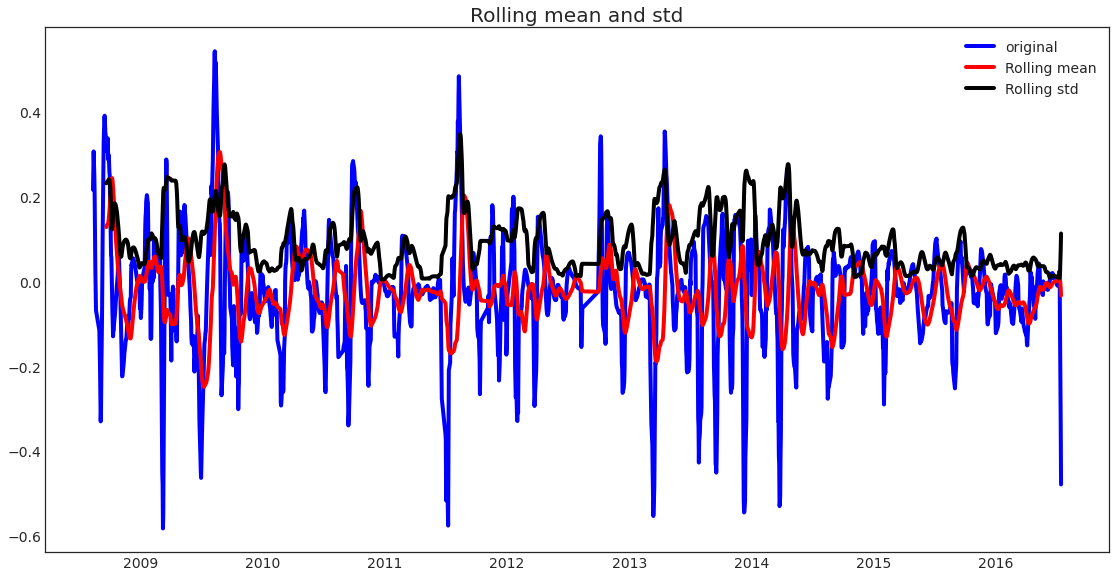

Result of Dickey-fuller test:
Test Statistic                -1.114111e+01
p-value                        3.106726e-20
#Lags Used                     2.400000e+01
Number of Obeservation used    2.648000e+03
Critical Values (1%)          -3.432822e+00
Critical Values (5%)          -2.862632e+00
Critical Values (10%)         -2.567351e+00
dtype: float64


In [ ]:
test_stationarity(df_logMinusmoving_avg['oil_vol'])

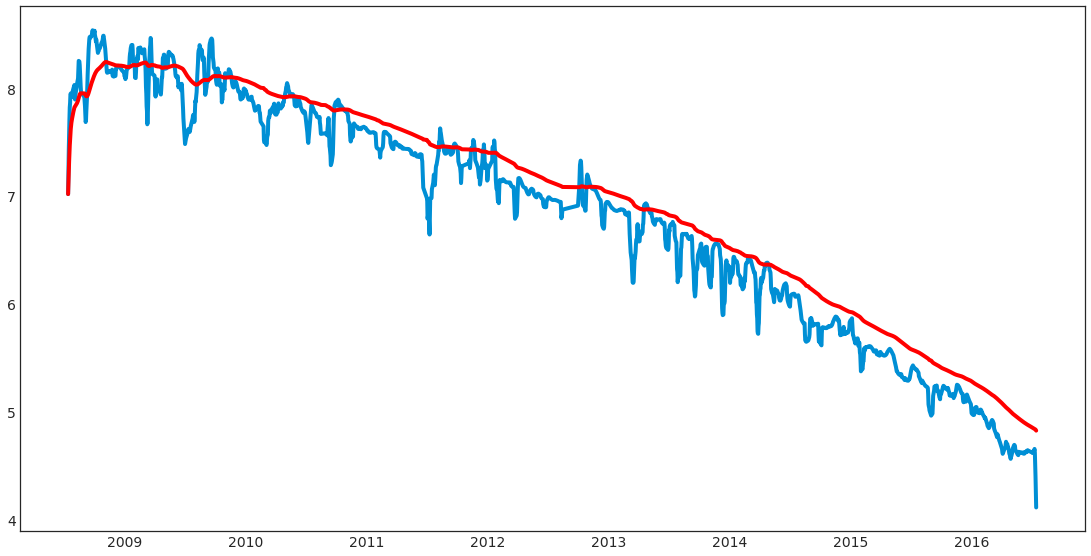

In [ ]:
exponentialDecayWighted_avg = df_logScale.ewm(halflife=90,min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWighted_avg, color='red')


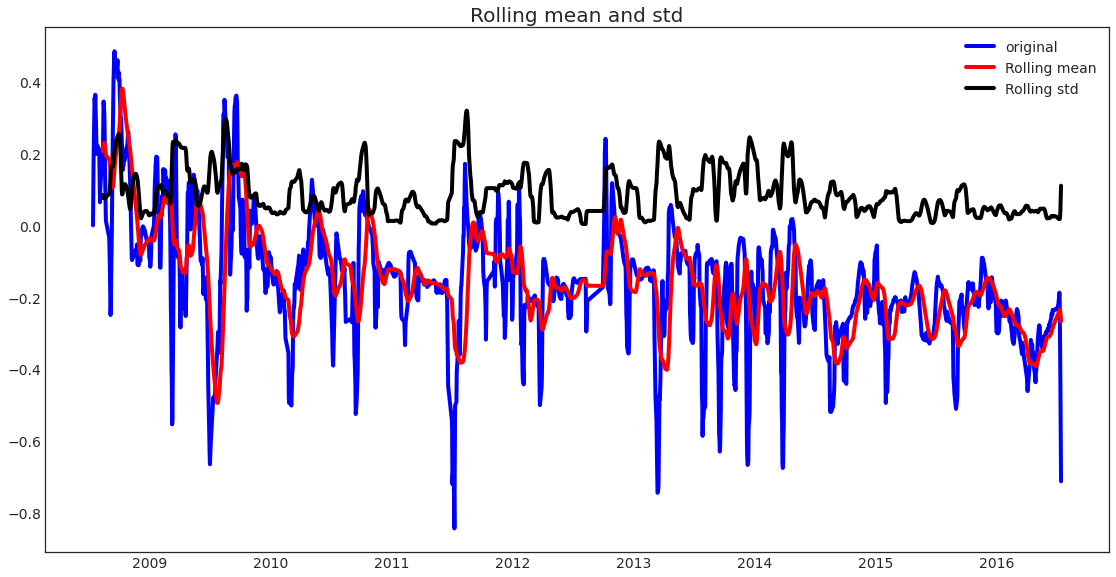

Result of Dickey-fuller test:
Test Statistic                -5.981273e+00
p-value                        1.836071e-07
#Lags Used                     2.300000e+01
Number of Obeservation used    2.678000e+03
Critical Values (1%)          -3.432794e+00
Critical Values (5%)          -2.862620e+00
Critical Values (10%)         -2.567345e+00
dtype: float64


In [ ]:
df_logscaleMinusMovingExponential_avg = df_logScale - exponentialDecayWighted_avg

test_stationarity(df_logscaleMinusMovingExponential_avg['oil_vol'])

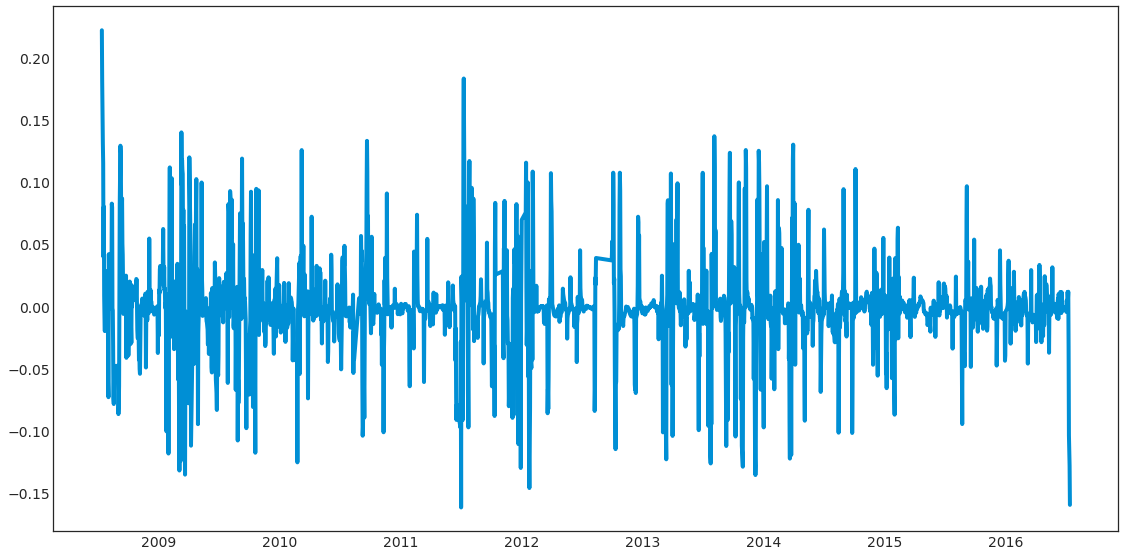

In [ ]:
df_logDiff_shifting = df_logScale - df_logScale.shift()
plt.plot(df_logDiff_shifting)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import statsmodels.api as sm

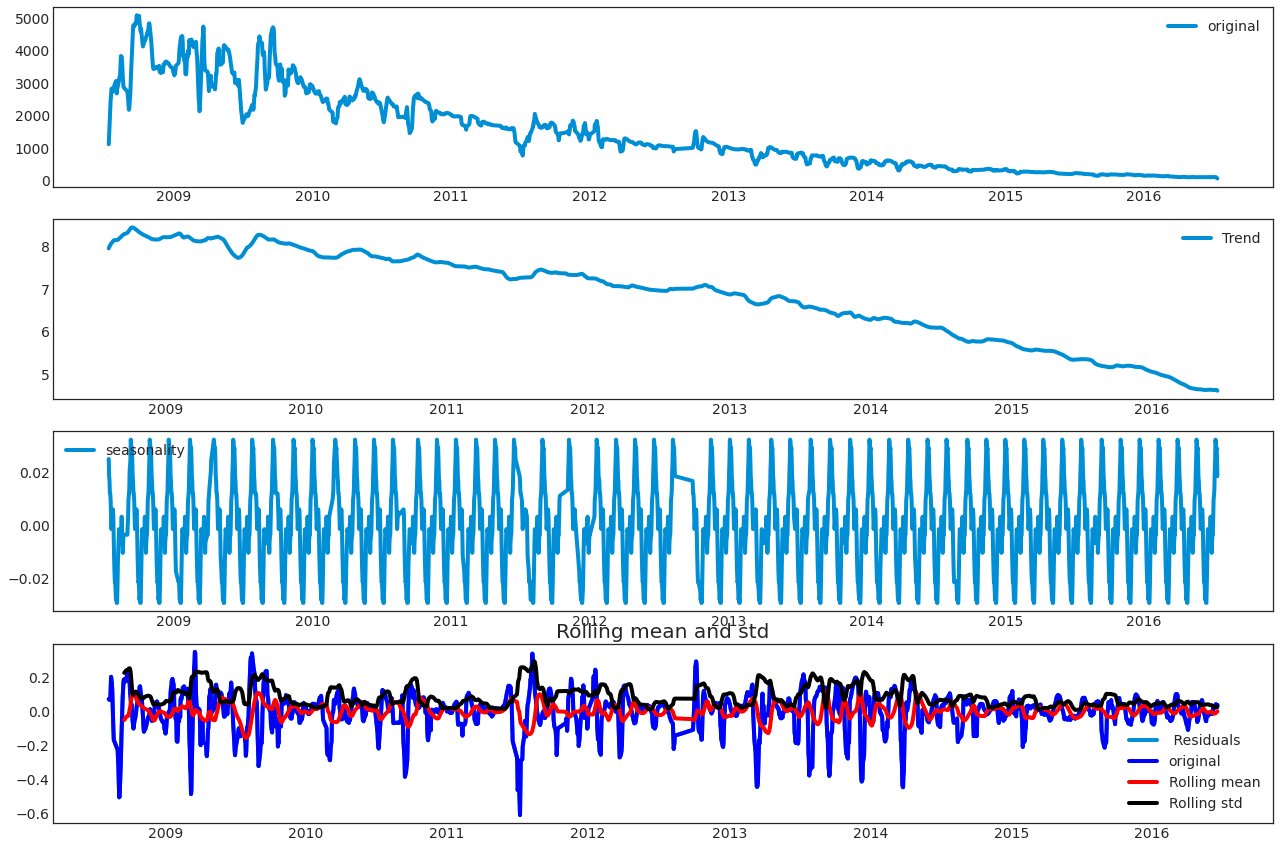

Result of Dickey-fuller test:
Test Statistic                -1.401124e+01
p-value                        3.710529e-26
#Lags Used                     2.800000e+01
Number of Obeservation used    2.623000e+03
Critical Values (1%)          -3.432846e+00
Critical Values (5%)          -2.862643e+00
Critical Values (10%)         -2.567357e+00
dtype: float64


In [ ]:

#decomposition = seasonal_decompose(df_logScale)
decomposition = sm.tsa.seasonal_decompose(df_logScale,freq=50) # model = 'additive'

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18,12))
plt.subplot(411)
plt.plot(df, label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = ' Residuals')
plt.legend(loc= 'best')
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData['oil_vol'])


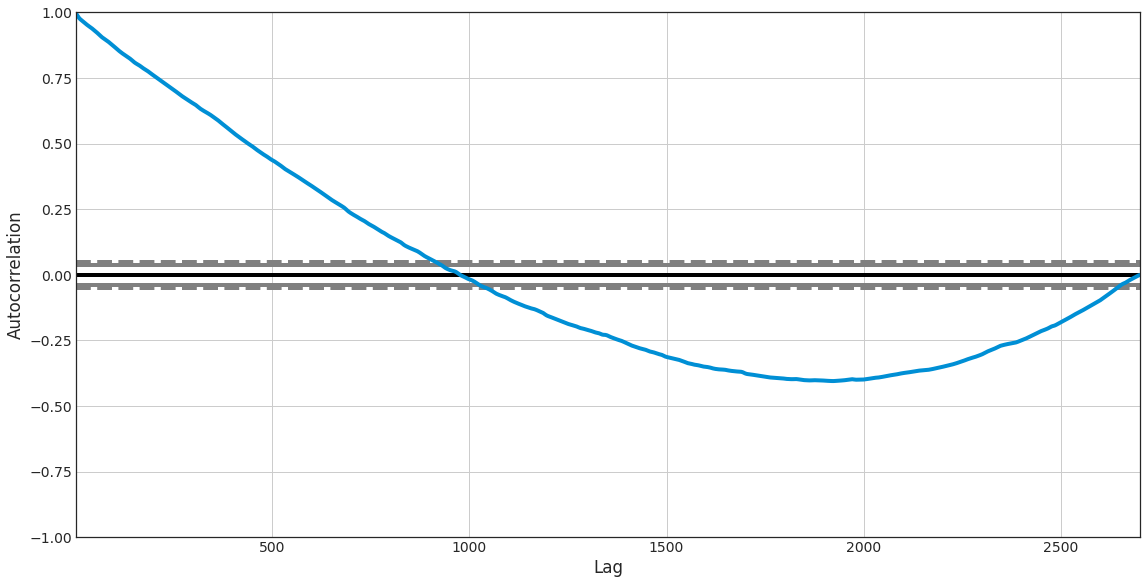

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_logScale) 

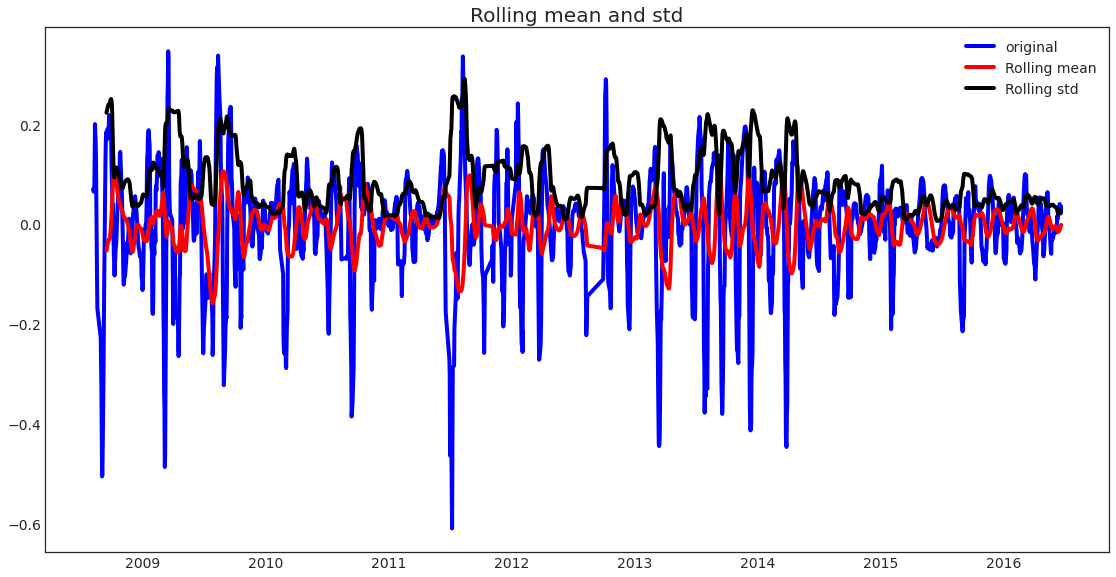

Result of Dickey-fuller test:
Test Statistic                -1.401124e+01
p-value                        3.710529e-26
#Lags Used                     2.800000e+01
Number of Obeservation used    2.623000e+03
Critical Values (1%)          -3.432846e+00
Critical Values (5%)          -2.862643e+00
Critical Values (10%)         -2.567357e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData['oil_vol'])

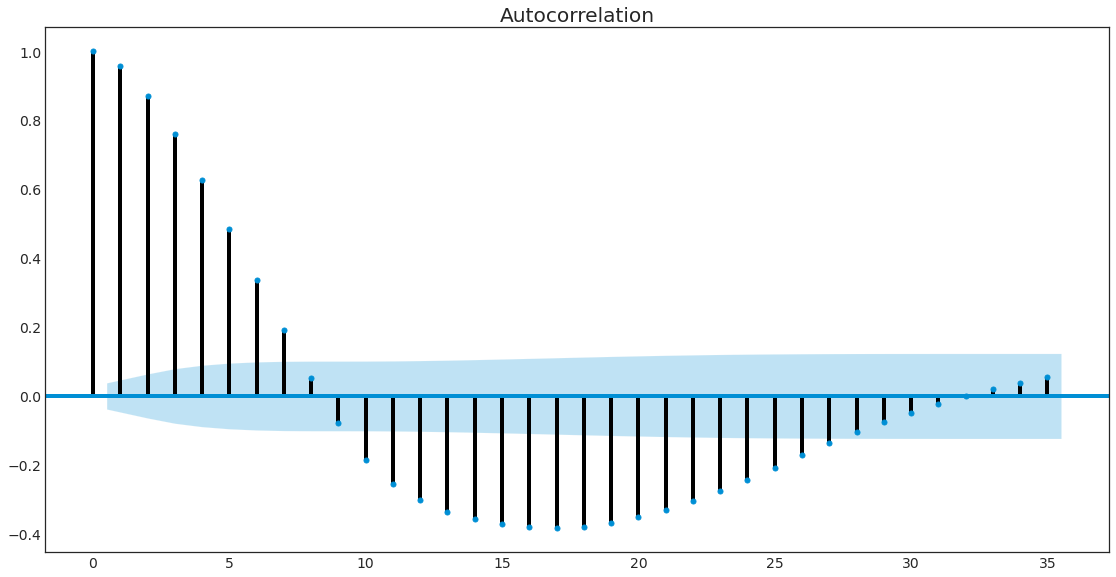

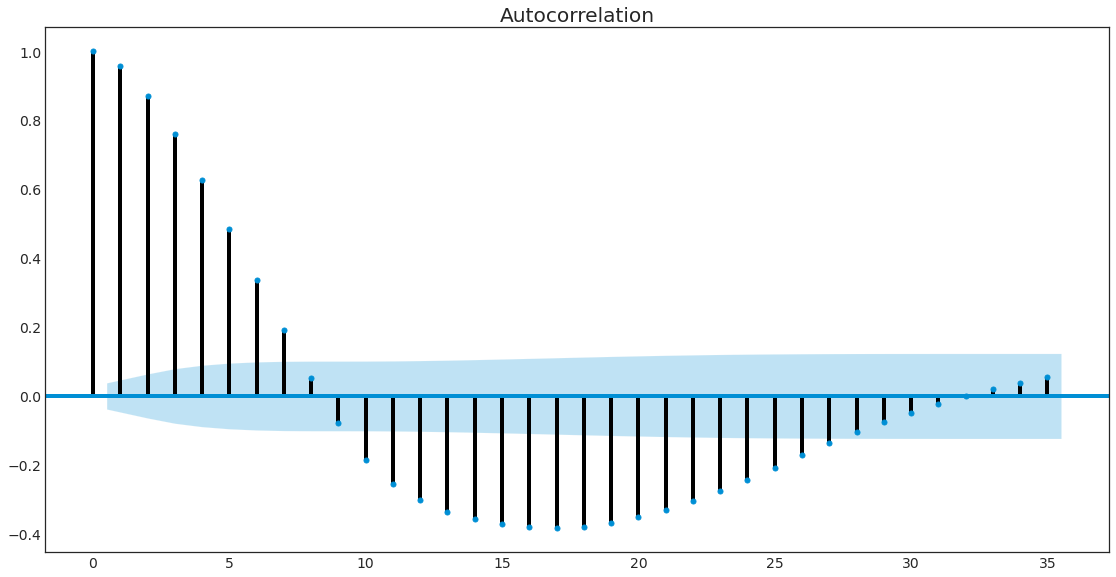

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(decomposedLogData)

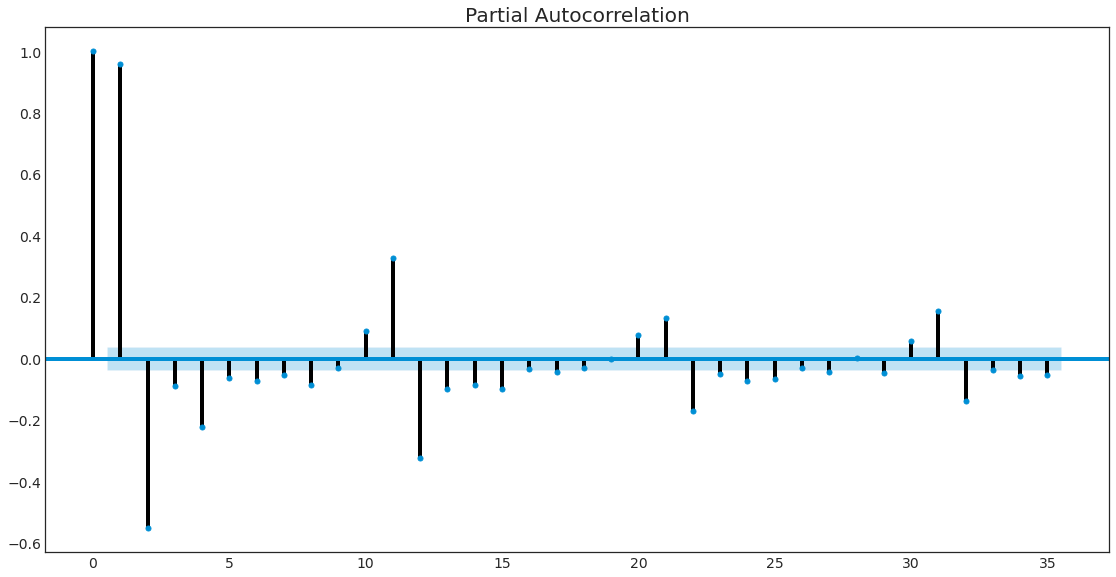

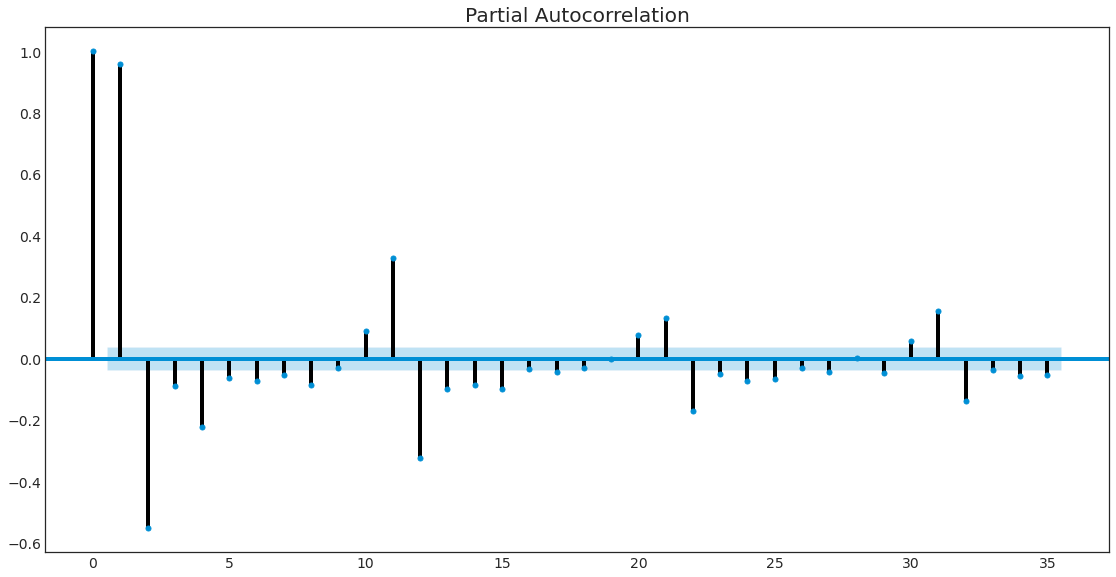

In [ ]:
plot_pacf(decomposedLogData)

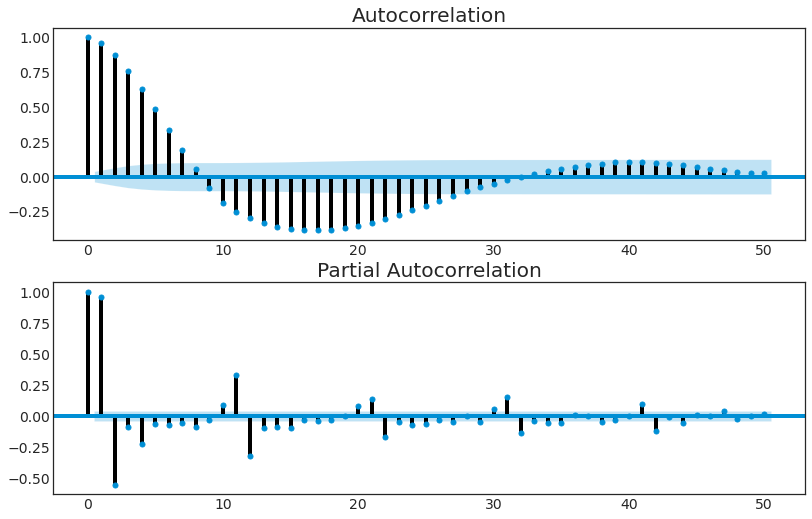

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(decomposedLogData, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(decomposedLogData, lags=50, ax=ax2)

In [ ]:
dfx = pd.DataFrame(df_logDiff_shifting)

In [ ]:
dfx.dropna(inplace=True)

In [ ]:
dfx.info

<bound method DataFrame.info of              oil_vol
dates               
2008-07-14  0.222099
2008-07-15  0.181285
2008-07-16  0.154262
2008-07-17  0.131465
2008-07-18  0.115147
...              ...
2016-07-09 -0.032753
2016-07-10 -0.103917
2016-07-11 -0.117461
2016-07-12 -0.128126
2016-07-13 -0.159780

[2701 rows x 1 columns]>

In [ ]:
size = int(len(df_logScale) * 0.8)
X_train, X_test = df_logScale[0:size], df_logScale[size:len(df_logScale)]

In [ ]:
print(X_train.size)
print(X_test.size)

2161
541


plotting AR Model for you


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



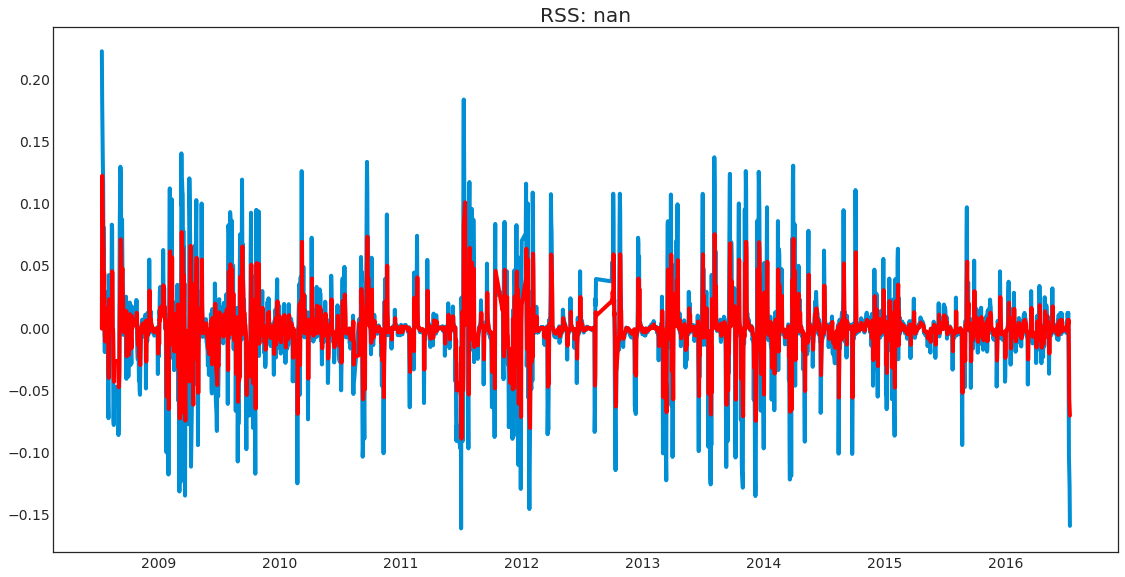

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(df_logScale, order=(1,1,0))
result_AR = model.fit(disp=-1)
plt.plot(df_logDiff_shifting)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_AR.fittedvalues - df_logDiff_shifting['oil_vol']))
print('plotting AR Model for you')

In [ ]:
#residuals = pd.DataFrame(result_AR.resid)
#residuals.plot()
#residuals.plot(kind='kde')
#plt.show()
##print(residuals.describe())

In [ ]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.oil_vol   No. Observations:                 2701
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5874.196
Method:                       css-mle   S.D. of innovations              0.027
Date:                Fri, 25 Jun 2021   AIC                         -11742.392
Time:                        12:24:21   BIC                         -11724.688
Sample:                             1   HQIC                        -11735.990
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0010      0.001     -0.888      0.375      -0.003       0.001
ar.L1.D.oil_vol     0.5511      0.016     33.703      0.000       0.519       0.583
                                

In [ ]:
result_AR.fittedvalues

dates
2008-07-14   -0.001046
2008-07-15    0.121922
2008-07-16    0.099431
2008-07-17    0.084540
2008-07-18    0.071977
                ...   
2016-07-09    0.005979
2016-07-10   -0.018519
2016-07-11   -0.057735
2016-07-12   -0.065199
2016-07-13   -0.071076
Length: 2701, dtype: float64

In [ ]:
df_logDiff_shifting

oil_vol
dates               
2008-07-13       NaN
2008-07-14  0.222099
2008-07-15  0.181285
2008-07-16  0.154262
2008-07-17  0.131465
...              ...
2016-07-09 -0.032753
2016-07-10 -0.103917
2016-07-11 -0.117461
2016-07-12 -0.128126
2016-07-13 -0.159780

[2702 rows x 1 columns]

In [ ]:
print(sum(result_AR.fittedvalues - dfx['oil_vol'])**2)

0.015119627913204526


In [ ]:
dfx = pd.DataFrame(df_logDiff_shifting)

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2702 entries, 2008-07-13 to 2016-07-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oil_vol  2701 non-null   float64
dtypes: float64(1)
memory usage: 122.2 KB


In [ ]:
dfx.dropna(inplace=True)

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2701 entries, 2008-07-14 to 2016-07-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   oil_vol  2701 non-null   float64
dtypes: float64(1)
memory usage: 42.2 KB


plotting MA Model for you


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



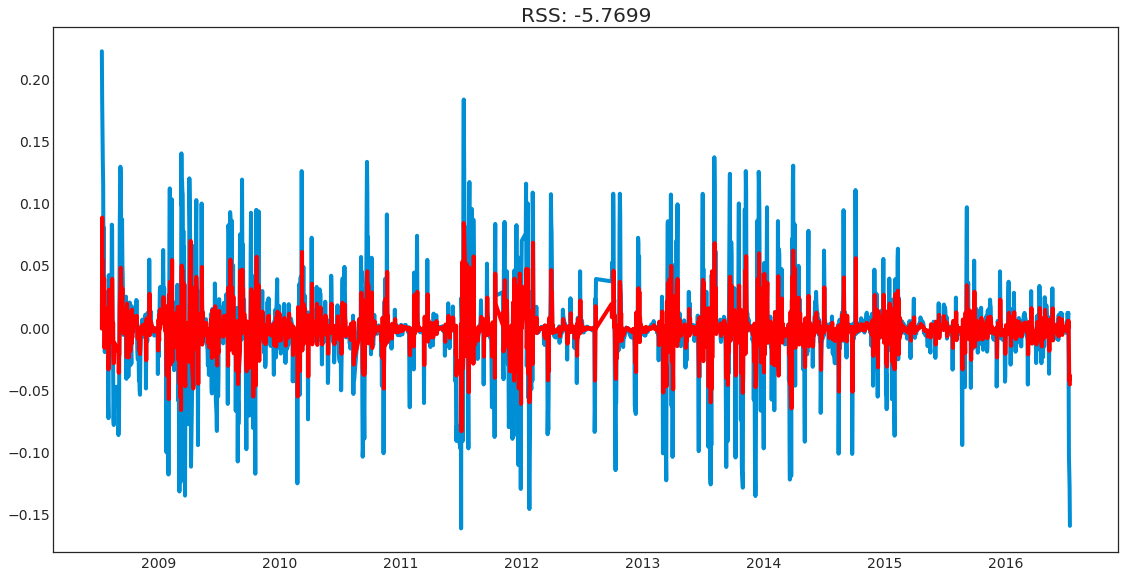

In [ ]:
#MA model
model = ARIMA(df_logScale, order=(0,1,1))
result_MA = model.fit()
plt.plot(df_logDiff_shifting)
plt.plot(result_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_MA.fittedvalues - dfx['oil_vol']**2))
print('plotting MA Model for you')

In [ ]:
print(result_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.oil_vol   No. Observations:                 2701
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5790.287
Method:                       css-mle   S.D. of innovations              0.028
Date:                Fri, 25 Jun 2021   AIC                         -11574.575
Time:                        12:24:22   BIC                         -11556.871
Sample:                             1   HQIC                        -11568.173
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0011      0.001     -1.302      0.193      -0.003       0.001
ma.L1.D.oil_vol     0.5011      0.016     32.266      0.000       0.471       0.532
                                

In [ ]:
print(sum(result_MA.fittedvalues - dfx['oil_vol'])**2)

0.001360337650663807


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



plotting MA Model for you


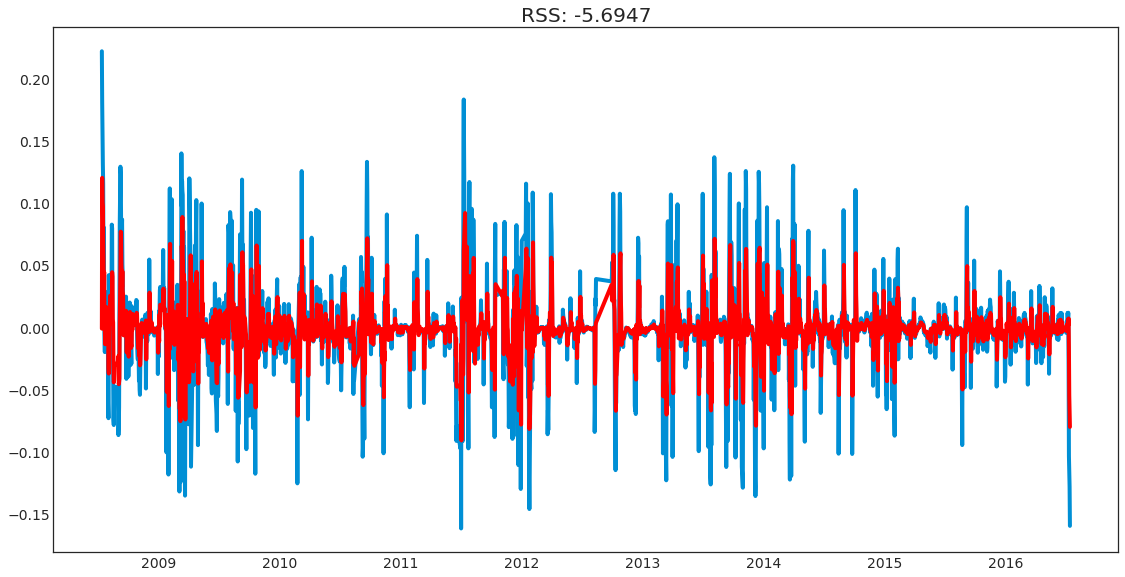

In [ ]:
#MA model
model = ARIMA(df_logScale, order=(0,1,4))
result_ARIMA = model.fit()
plt.plot(df_logDiff_shifting)
plt.plot(result_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(result_ARIMA.fittedvalues - dfx['oil_vol']**2))
print('plotting MA Model for you')

In [ ]:
print(sum(result_ARIMA.fittedvalues - dfx['oil_vol'])**2)

0.012567452511240565


In [ ]:
print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.oil_vol   No. Observations:                 2701
Model:                 ARIMA(0, 1, 4)   Log Likelihood                5899.941
Method:                       css-mle   S.D. of innovations              0.027
Date:                Fri, 25 Jun 2021   AIC                         -11787.882
Time:                        12:24:22   BIC                         -11752.473
Sample:                             1   HQIC                        -11775.077
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0010      0.001     -0.897      0.370      -0.003       0.001
ma.L1.D.oil_vol     0.5354      0.019     28.326      0.000       0.498       0.572
ma.L2.D.oil_vol     0.2638      

In [ ]:
# converting time series data of prediction using ARIMA
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff)

dates
2008-07-14   -0.001046
2008-07-15    0.120287
2008-07-16    0.100572
2008-07-17    0.097308
2008-07-18    0.071163
                ...   
2016-07-09    0.007104
2016-07-10   -0.018078
2016-07-11   -0.054861
2016-07-12   -0.066406
2016-07-13   -0.080160
Length: 2701, dtype: float64


In [ ]:
#convert to cumulative sum
prediction_ARIMA_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_cumsum.head())

dates
2008-07-14   -0.001046
2008-07-15    0.119240
2008-07-16    0.219812
2008-07-17    0.317120
2008-07-18    0.388283
dtype: float64


In [ ]:
# data scaled to cumulative sum 
prediction_ARIMA_log = pd.Series(df_logScale['oil_vol'].iloc[0], index = df_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_cumsum, fill_value = 0)
prediction_ARIMA_log.head()

dates
2008-07-13    7.019173
2008-07-14    7.018127
2008-07-15    7.138414
2008-07-16    7.238985
2008-07-17    7.336293
dtype: float64

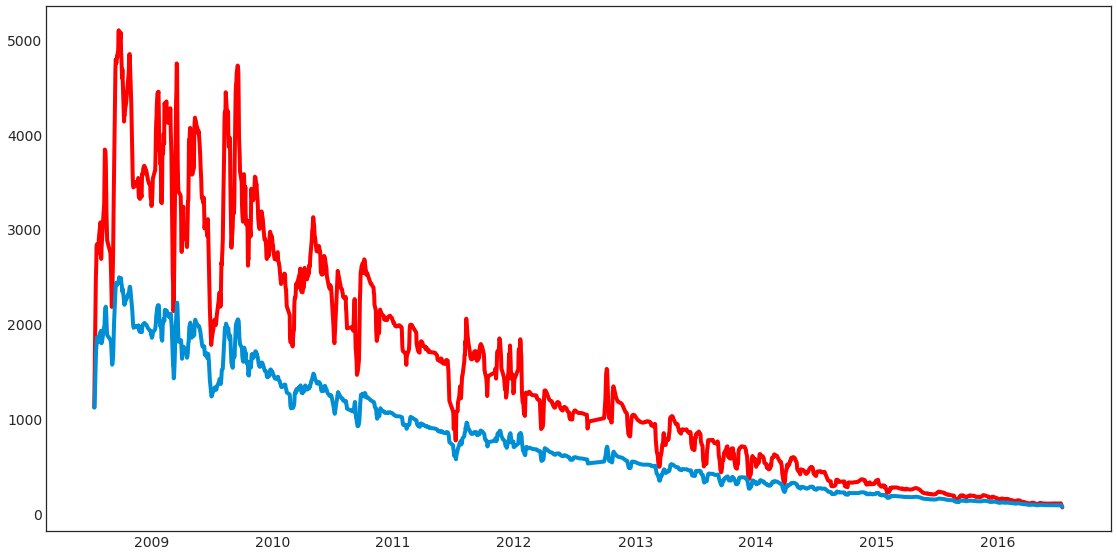

In [ ]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df,color='red')
plt.plot(prediction_ARIMA)

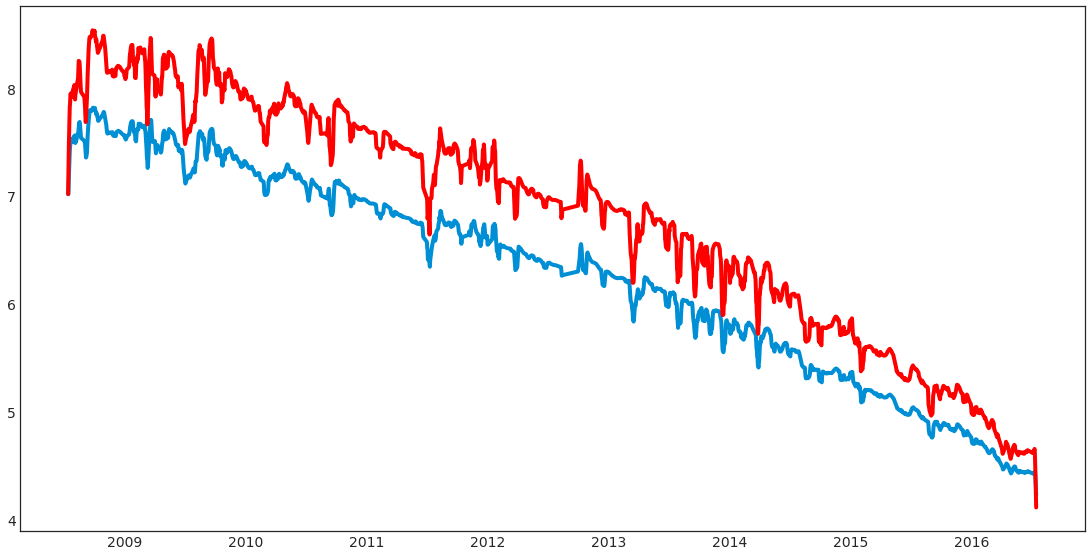

In [ ]:
plt.plot(prediction_ARIMA_log)
plt.plot(df_logScale, color = 'red')

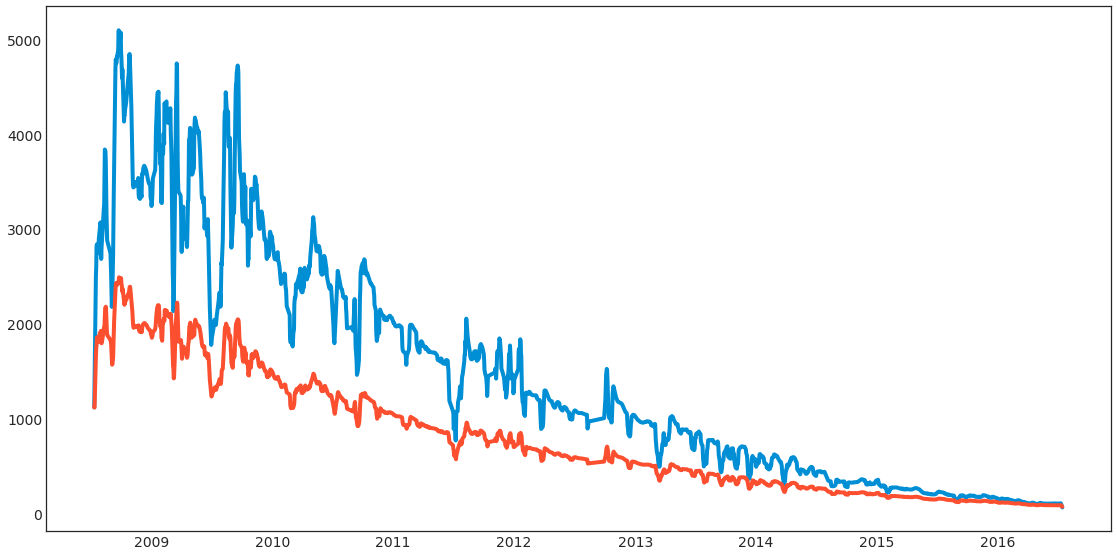

In [ ]:
# transform the result by taking exponential because we have log data before 
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df)
plt.plot(prediction_ARIMA)


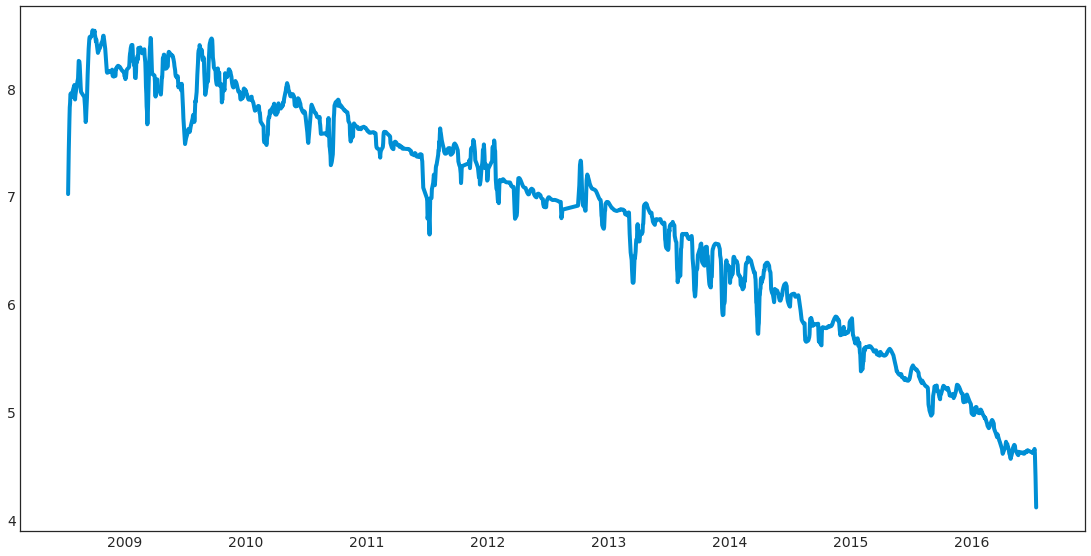

In [ ]:
x = np.log(df)
plt.plot(df_logScale)

In [ ]:
df_logScale

oil_vol
dates               
2008-07-13  7.019173
2008-07-14  7.241272
2008-07-15  7.422557
2008-07-16  7.576818
2008-07-17  7.708284
...              ...
2016-07-09  4.624934
2016-07-10  4.521017
2016-07-11  4.403556
2016-07-12  4.275429
2016-07-13  4.115649

[2702 rows x 1 columns]

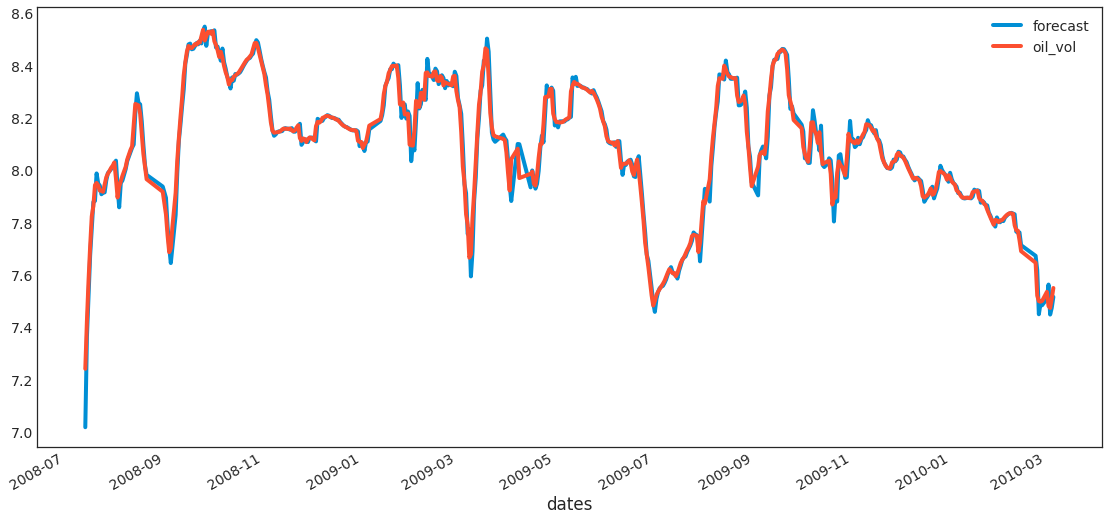

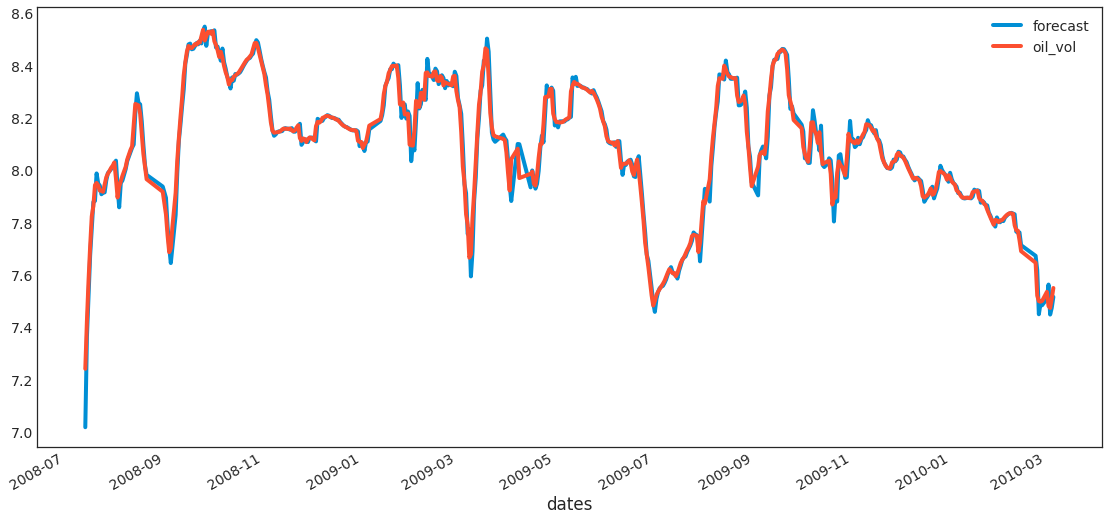

In [ ]:
#plt.plot(train, color = 'red')
#plt.plot(test , color = 'green')
result_ARIMA.plot_predict(1,550)


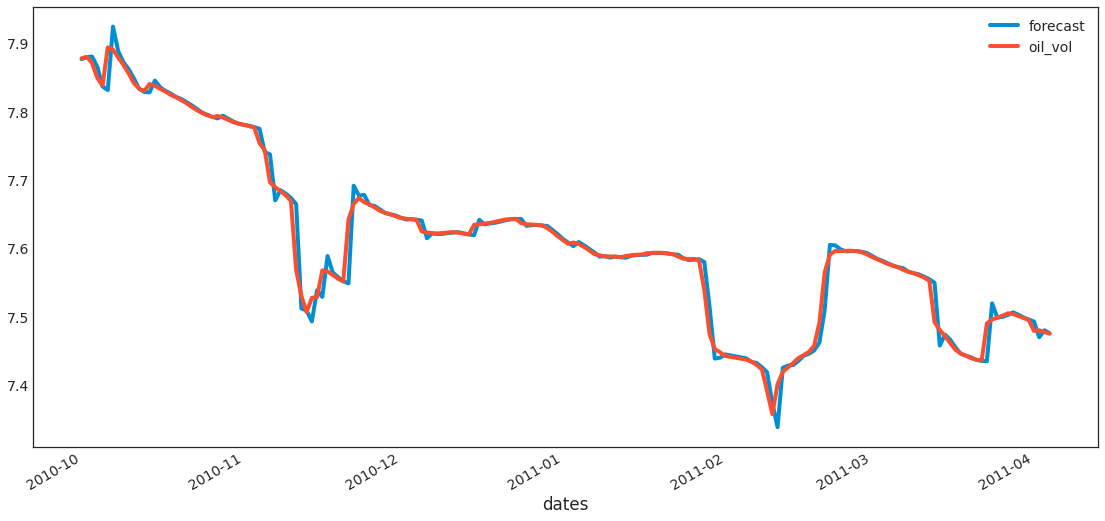

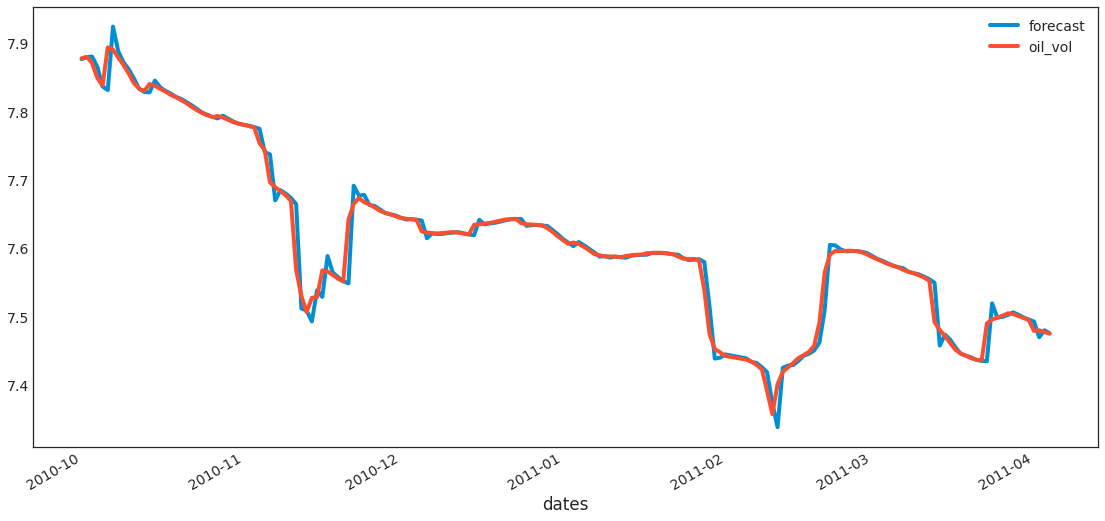

In [ ]:
result_AR.plot_predict(741,923)

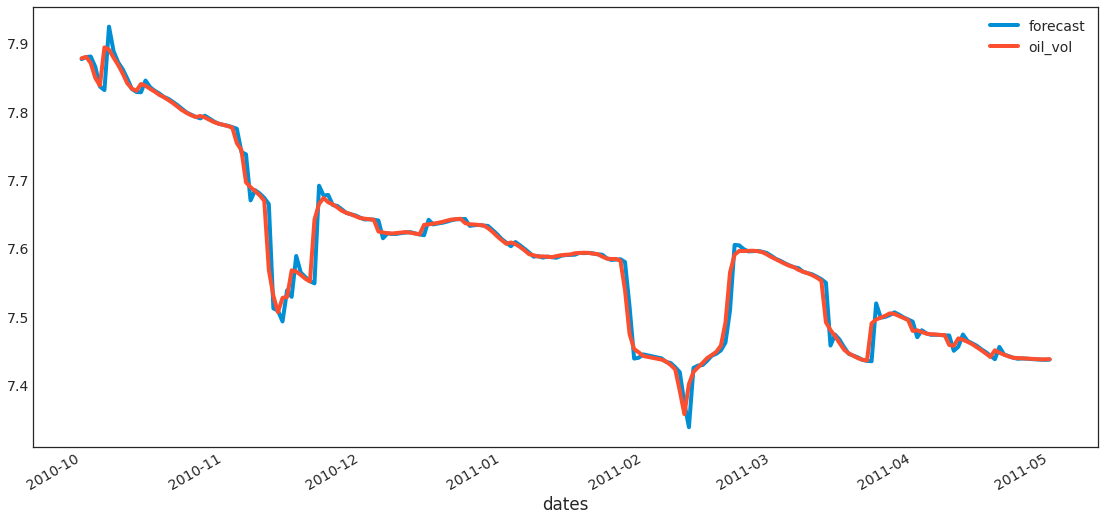

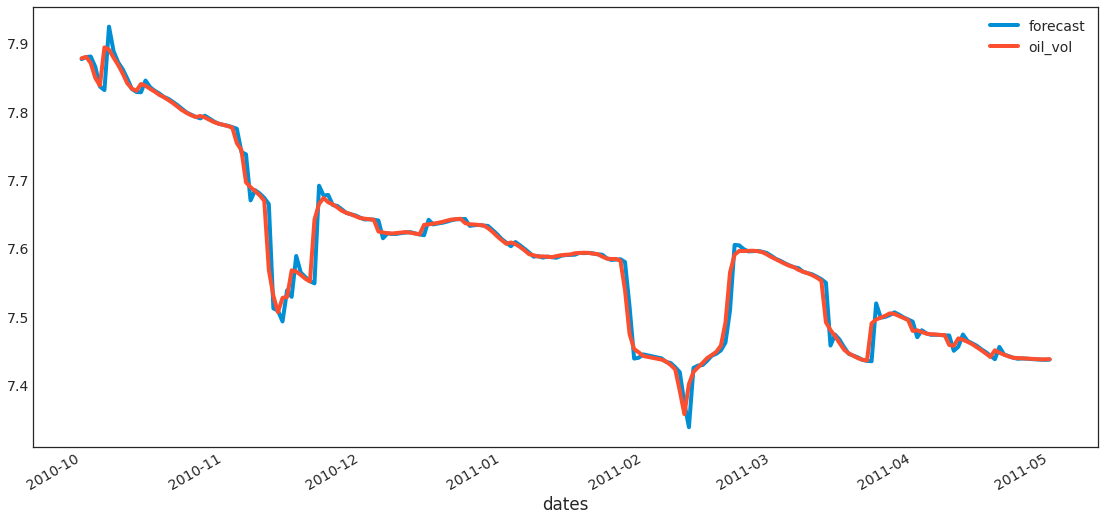

In [ ]:
result_AR.plot_predict(741,950)

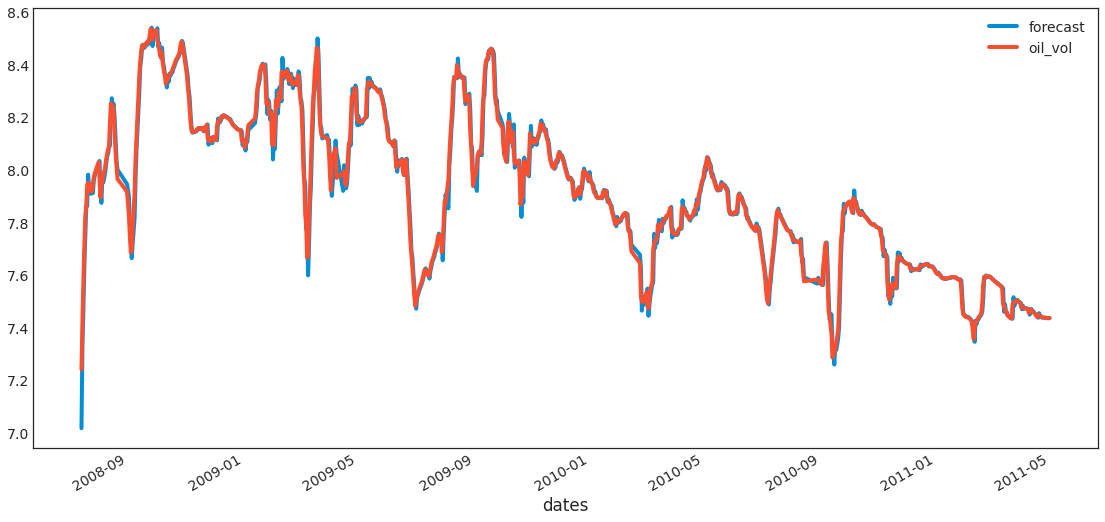

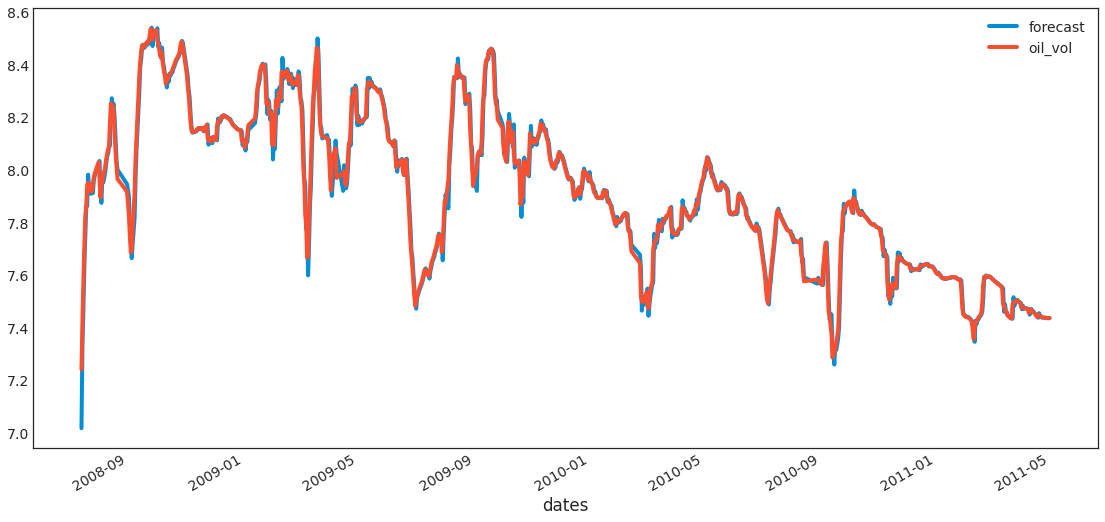

In [ ]:
result_MA.plot_predict(1,950)

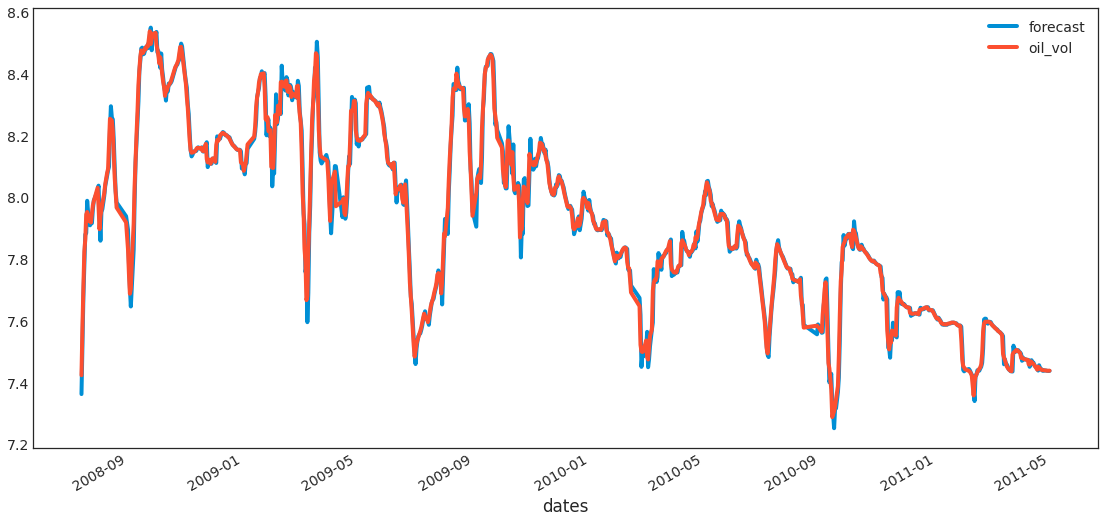

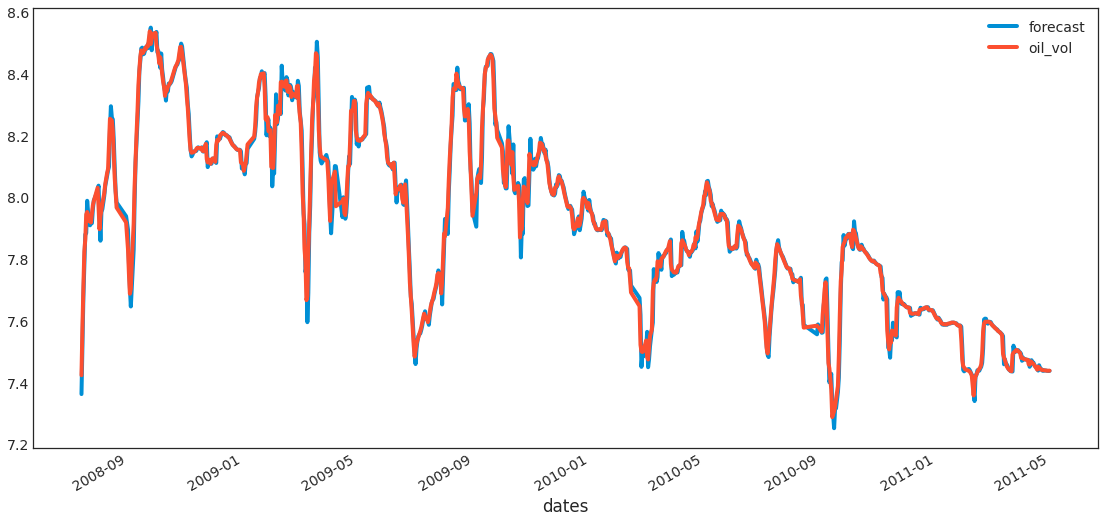

In [ ]:
result_ARIMA.plot_predict(2,950)

In [ ]:
pip install pmdarima

In [ ]:
#from pmdarima.arima import auto_arima

#arima_model = auto_arima(df_logScale['oil_vol'], start_p = 1, d=1, start_q = 1, 
                     #     max_p = 10, max_q = 10, max_d=2, m = 12, 
                    #     start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                     #     seasonal = True, 
                     #     trace = True, 
                    #      error_action ='ignore',   
                     #     suppress_warnings = True,  
                     #     stepwise = True, n_fits=10)           
  

#print(arima_model.summary() ) 

# LSTM

In [ ]:
df.head()

oil_vol
dates               
2008-07-13  1117.862
2008-07-14  1395.868
2008-07-15  1673.306
2008-07-16  1952.407
2008-07-17  2226.717

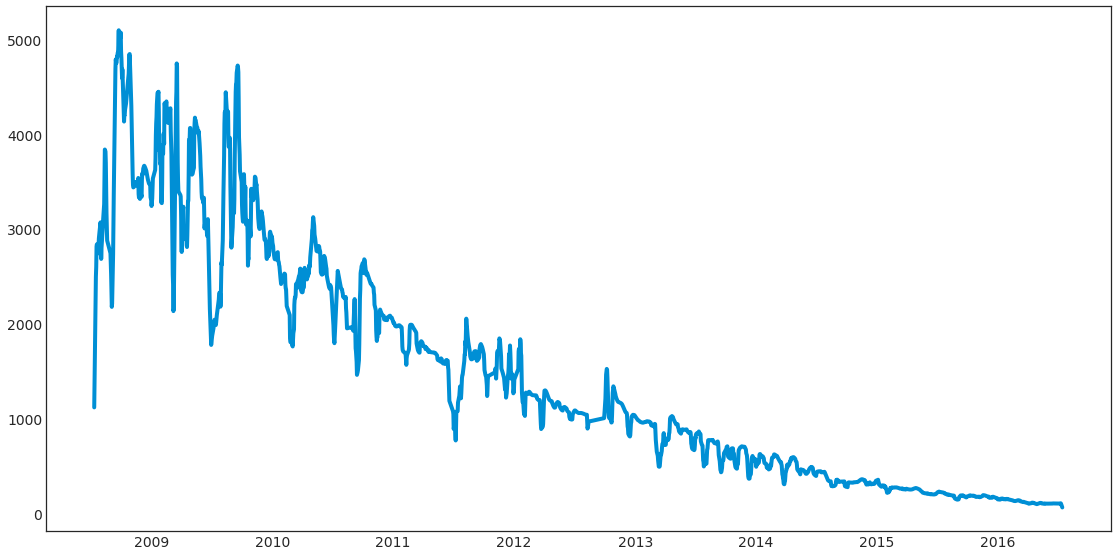

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2161, 541)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2060, 100)
(2060,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(440, 100)
(440,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
33/33 [==============================] - 12s 206ms/step - loss: 0.0298 - val_loss: 0.0028
Epoch 2/10
33/33 [==============================] - 6s 167ms/step - loss: 0.0040 - val_loss: 2.6888e-04
Epoch 3/10
33/33 [==============================] - 5s 166ms/step - loss: 0.0034 - val_loss: 3.2132e-05
Epoch 4/10
33/33 [==============================] - 6s 168ms/step - loss: 0.0033 - val_loss: 5.4182e-05
Epoch 5/10
33/33 [==============================] - 5s 166ms/step - loss: 0.0032 - val_loss: 1.8227e-05
Epoch 6/10
33/33 [==============================] - 6s 167ms/step - loss: 0.0029 - val_loss: 4.4353e-06
Epoch 7/10
33/33 [==============================] - 6s 170ms/step - loss: 0.0028 - val_loss: 1.6761e-05
Epoch 8/10
33/33 [==============================] - 5s 166ms/step - loss: 0.0026 - val_loss: 4.5506e-06
Epoch 9/10
33/33 [==============================] - 6s 167ms/step - loss: 0.0024 - val_loss: 6.9971e-05
Epoch 10/10
33/33 [==============================] - 6s 168ms/step 

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1982.2776946975855

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

139.49575709167976

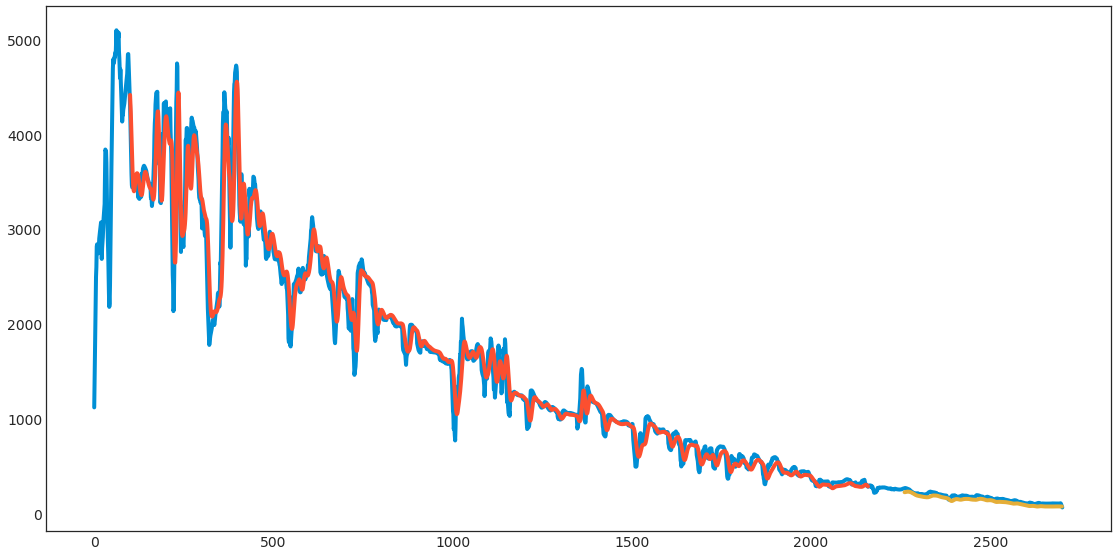

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)


541

In [ ]:
x_input=test_data[440:].reshape(1,-1)
x_input.shape


(1, 101)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.00816596 0.00835988 0.00853832 0.00867924 0.00880329 0.00893885
 0.00902103 0.00973775 0.0101889  0.0097824  0.00970976 0.00971611
 0.00970202 0.00907958 0.00911153 0.00890094 0.00869948 0.00832336
 0.00783728 0.00773923 0.00750502 0.00720372 0.00692227 0.0073897
 0.00739962 0.00761914 0.00790397 0.00825072 0.00861612 0.00895314
 0.00912324 0.00926873 0.00946066 0.00956268 0.0094563  0.00935011
 0.00856094 0.00846746 0.0083311  0.00818938 0.00805759 0.00794823
 0.00781604 0.00771045 0.00762867 0.00758024 0.00820923 0.00813401
 0.00809272 0.00807029 0.00804648 0.00801928 0.00805977 0.00808975
 0.00809491 0.00799229 0.00798991 0.00799825 0.00802881 0.00805958
 0.00787003 0.00790178 0.00796212 0.00808915 0.00788332 0.00808359
 0.00812111 0.00813401 0.00816041 0.00815266 0.00838826 0.00841149
 0.00837119 0.00825985 0.00849306 0.00841446 0.00839243 0.00836802
 0.00833269 0.00829637 0.00827295 0.00824972 0.00820447 0.00819355
 0.0081612  0.00814453 0.00809094 0.00807724 0.0079

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

2702

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2602:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1500:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)